In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
houses = fetch_california_housing()

In [2]:
housesDf = pd.DataFrame(houses.data,columns=houses.feature_names)
housesDf['Target'] = houses.target
housesDf

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

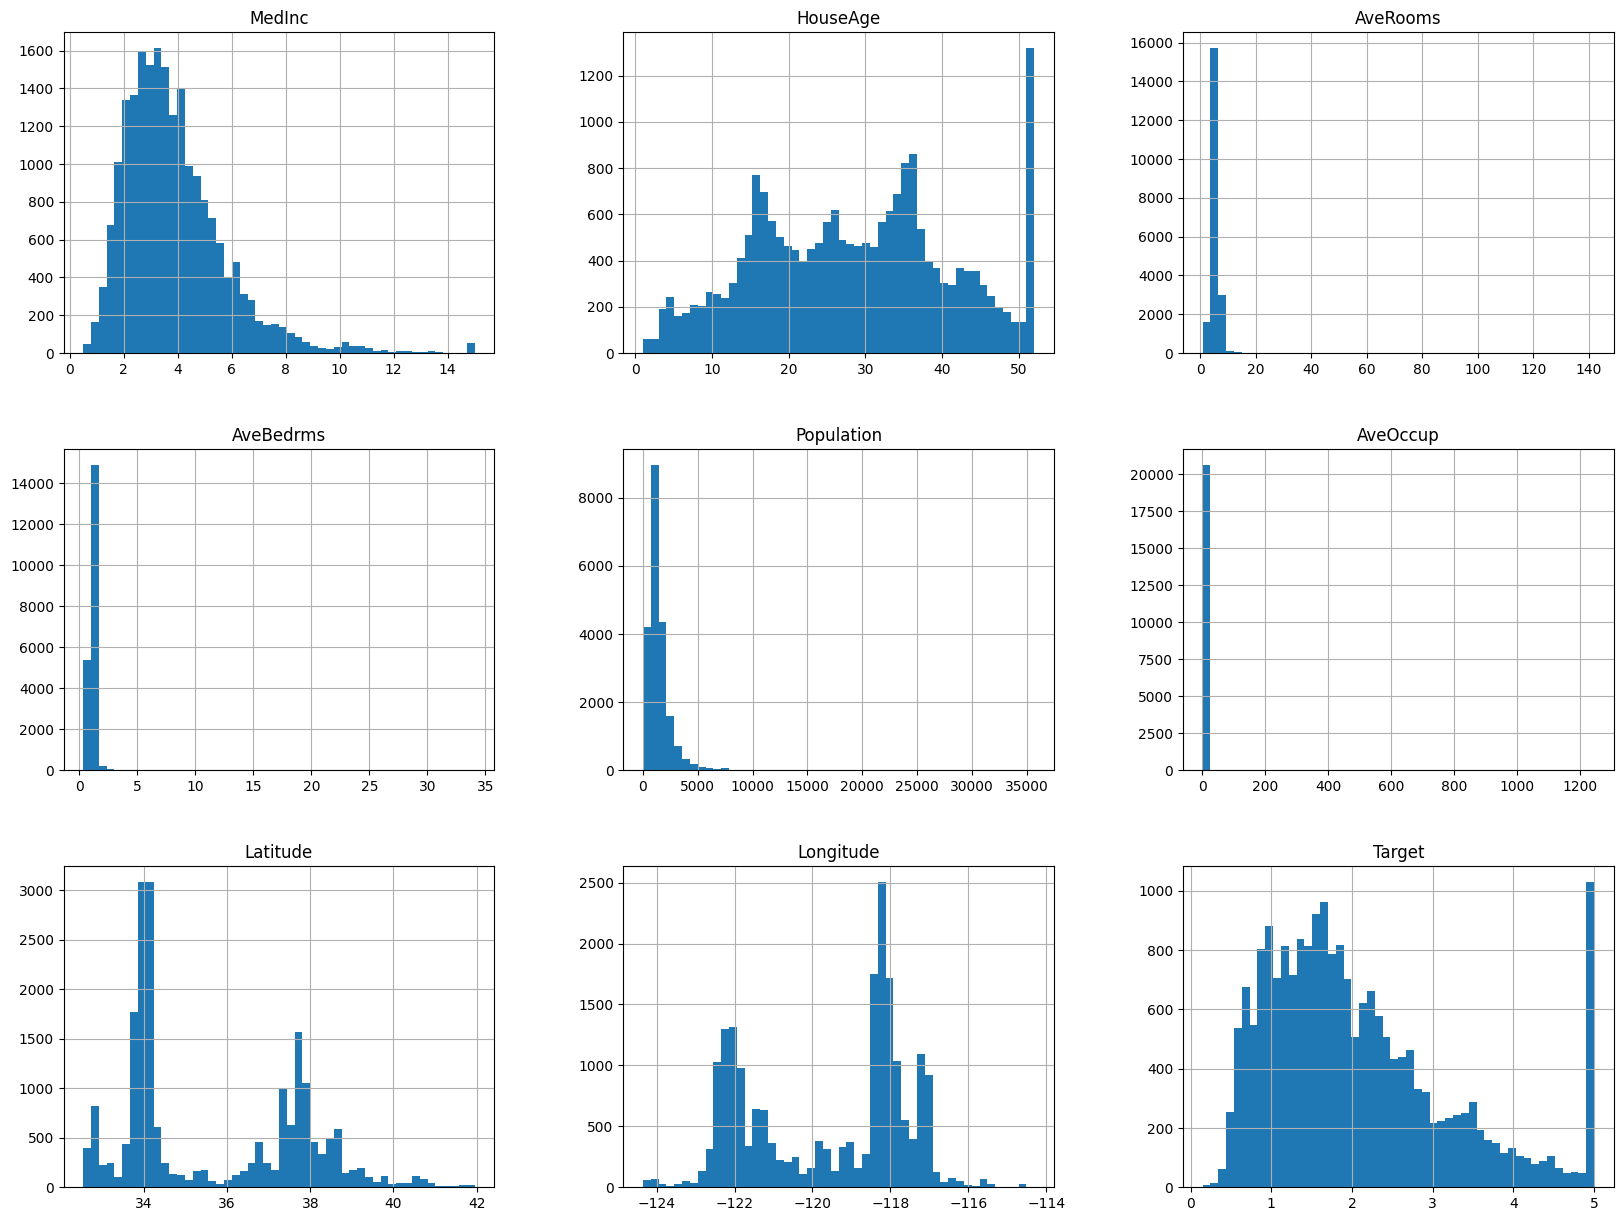

In [3]:
#Plotting histograms for various features
housesDf.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: >

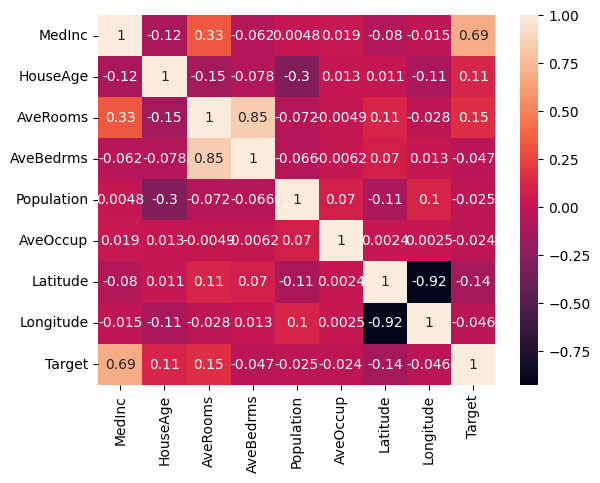

In [4]:
import seaborn as sns

sns.heatmap(housesDf.corr(),annot=True)

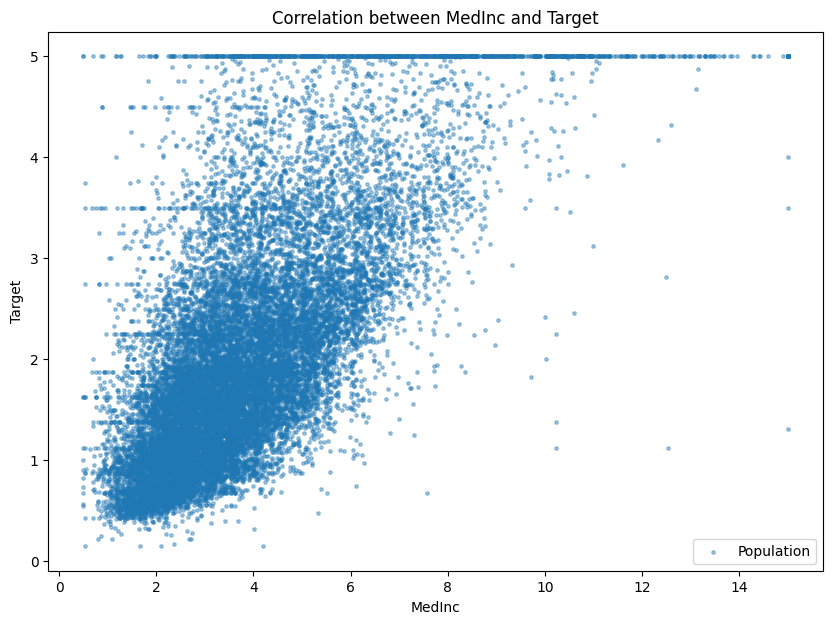

In [5]:
housesDf.plot(kind="scatter", x="MedInc", y="Target", alpha=0.4,
s=6, label="Population", figsize=(10,7),title='Correlation between MedInc and Target')
plt.legend()

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_housesDf = sc.fit_transform(housesDf)
target = scaled_housesDf[:,8]
data = scaled_housesDf[:,0:8]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=25)

# Reshaping y_train and y_test to 2d array
y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)

In [8]:
# function to compute gradient of error
def gradient(X, y, theta): 
    h = np.dot(X, theta) 
    grad = (2/X.shape[0])*np.dot(X.T, (np.dot(X, theta) - y)) 
    return grad 
  
# function to compute MSE
def cost(X, y, theta): 
    h = np.dot(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J[0]

def predict(X,theta):
    return np.dot(X, theta[0:8]) + theta[8]

In [9]:
plt.style.use('seaborn-whitegrid') # plot style

C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\836965908.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # plot style


In [18]:
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.model_selection import cross_validate,KFold

# Using kfold for the cross validation
kf = KFold(n_splits=5)

# MUST BE EXECUTED AFTER GRADIENT DESCENT CLASSES
def GridSearch(gradientDescent,data,target,X_train, y_train,X_test, y_test, learning_rates_list, epochs, batches):
    
    mse_list = []

    # if no batches
    if (len(batches)==0):
        batches.append("-")

    # grid search loop
    for b in batches:
        for lr in learning_rates_list:
            if (batches[0]=="-"):
                bgd = gradientDescent(lr ,epochs)
                bgd.fit(X_train, y_train)
                theta, error_list = bgd.get_fit_result()
                plot_list = bgd.get_plot_list()
            else:
                bgd = gradientDescent(lr ,epochs, b)
                bgd.fit(X_train, y_train)
                theta, error_list = bgd.get_fit_result()
                plot_list = bgd.get_plot_list()
                
            # prediction for the test set
            prediction = predict(X_test,theta)

            # printing usefull data
            print("------------------------------------------------------------------------------------")
            print("\nLEARNING RATE: ",lr)
            print("MAX_ITERATIONS: ",epochs)
            if(gradientDescent == MiniBatchGradientDescent):
                print("BATCH_SIZE: ",b)
            print("Prediction and scores for X_test")
            print("MSE: ",mean_squared_error(y_test,prediction))
            print("R2: ",r2_score(y_test,prediction))
            print("Bias = ", theta[8]) 
            print("Plots\n") 

            f = plt.figure(figsize=(10,10))
            plt.subplots_adjust( wspace=0.5, hspace=0.5)    
            
            # First plot - Number of iterations and their affect to MSE
            title = 'Learning rate = '+ str(lr)
            plt.title(title)
            ax1 = plt.subplot(222)
            ax1.plot(range(0,epochs,1),error_list, color = 'blue',label='#Iterations')
            ax1.set_xlabel("Number of iterations") 
            ax1.set_ylabel("MSE") 
            ax1.set_title('MSE per Number of iterations')
            
            # Second plot is the evaluation of regression at training steps
            ax2 = plt.subplot(221)
            ax2.set_ylim([-2,4])
            ax2.set_xlim([-3,7])
            ax2.scatter(X_test[:,0],y_test, color = 'blue',alpha = 0.3,label='MedInc vs target',s=5) 
            ax2.plot(X_test[:,0],prediction, color = 'green',alpha = 0.3,label = 'Prediction area')
            
            if(gradientDescent == StochasticGradientDescent ):
                num_lines = len(y_train)*epochs
                line_range = range(0,num_lines,int(num_lines/100))
            elif(gradientDescent == MiniBatchGradientDescent ):
                num_lines = int(len(y_train)/b)*epochs
                line_range = range(0,num_lines,int(num_lines/100))
            else:
                line_range = range(epochs)
                
            for p in line_range:
                ax2.plot([plot_list[p][0],plot_list[p][1]] , [plot_list[p][2],plot_list[p][3]] ,color = 'r',alpha = 0.15)            
            ax2.set_title('Linear regression while training')
            ax2.set_xlabel("Prediction / True label") 
            ax2.set_ylabel("MedInc")
            legend = ax2.legend(shadow=True,loc='upper right',frameon=True)
            
            # Third plot depicts the linear regression at the test set, and the area that was checked from the algorithm
            ax3 = plt.subplot(212)
            ax3.scatter(X_test[:,0],y_test, color = 'blue',alpha = 0.3,label='MedInc vs target',s=5) 
            ax3.plot(X_test[:,0],prediction, color = 'green',alpha = 0.4,label='Prediction area')
            ax3.plot([min(X_test[:,0]), max(X_test[:,0])], [min(prediction), max(prediction)], color = 'r', lw = 3,label = 'Linear regression') 
            ax3.set_title('Prediction on test set')
            ax3.set_xlabel("Prediction") 
            ax3.set_ylabel("MedInc")
            legend = ax3.legend(shadow=True,loc='upper right',frameon=True)
            
            plt.show()
            
            # Doing a cross validation
            print('\nCROSS-VALIDATION')
            scores = cross_validate(bgd, data, target, cv=kf ,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
            print('TEST_R2: ',scores['test_r2'])
            print('TRAIN_R2: ',scores['train_r2'],"\n")
            print('TEST_MSE: ',-scores['test_neg_mean_squared_error'])
            print('TRAIN_MSE: ',-scores['train_neg_mean_squared_error'],"\n")
            Learning_Curves(bgd,data,target,kf)
            
            print("------------------------------------------------------------------------------------")        

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def Learning_Curves(model,X,y,cv):

    train_sizes=np.linspace(.05, 1.0, 5)
  
    fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, constrained_layout=True,figsize=(10,5))

    # Mse learning curves
    mse_train_sizes, mse_train_scores, mse_validation_scores = learning_curve(estimator = model,X = X,y =y, cv = cv,train_sizes = train_sizes,n_jobs=4,scoring = 'neg_mean_squared_error')
    
    # R2 learning curves
    r2_train_sizes, r2_train_scores, r2_validation_scores = learning_curve(estimator = model,X = X,y =y, cv = cv,train_sizes = train_sizes,n_jobs=4,scoring = 'r2')    

    # Calculating mean of the returned vectors 
    mse_train_scores_mean = np.mean(-mse_train_scores,axis=1)
    mse_validation_scores_mean = np.mean(-mse_validation_scores,axis=1)
    r2_train_scores_mean = np.mean(r2_train_scores,axis=1)
    r2_validation_scores_mean = np.mean(r2_validation_scores,axis=1)

    # MSE plot
    ax1.plot(mse_train_sizes, mse_train_scores_mean,'o-', label = 'Training error',color='b')
    ax1.plot(mse_train_sizes, mse_validation_scores_mean,'o-', label = 'Validation error',color='r')
    ax1.set_ylabel('MSE')
    ax1.set_xlabel('Training set size')
    ax1.set_title('Learning curves for MSE',y = 1.03)
    ax1.legend(loc="best")

    # R2 plot
    ax2.plot(r2_train_sizes, r2_train_scores_mean, 'o-', color="r",label="Training score")
    ax2.plot(r2_train_sizes, r2_validation_scores_mean, 'o-', color="b",label="Cross-validation score")
    ax2.set_ylabel('R2')
    ax2.set_xlabel('Training set size')
    ax2.set_title('Learning curves for R2',y = 1.03)
    ax2.legend(loc="best")


    plt.show()

In [16]:
class BatchGradientDescent():
    
    def __init__(self, learning_rate=0.1, iterations=100):
        self.learning_rate, self.iterations = learning_rate, iterations
        
    def fit(self,X, y):
        X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
        theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
        error_list = []
        plot_list = []
        
        for s in range(self.iterations):
            prediction = np.dot(X,theta)
            gradient = (2/X.shape[0])*np.dot(X.T, (prediction - y)) 
            theta = theta - self.learning_rate * gradient
            error_list.append(cost(X, y, theta)) #useful for plotting changes when using different batch sizes
            plot_list.append((min(X[:,0]), max(X[:,0]),min(prediction), max(prediction)))
                                                                    
        self.theta,self.error_list = theta,error_list
        self.plot_list = plot_list
        
    def predict(self,X):
        return np.dot(X, self.theta[0:8]) + self.theta[8]
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "iterations": self.iterations}

    def get_plot_list(self):
        return self.plot_list
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
    
    def get_fit_result(self):
        return self.theta,self.error_list

------------------------------------------------------------------------------------

LEARNING RATE:  0.0001
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.9317093890273719
R2:  0.04119819779845335
Bias =  [-7.72054191e-05]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


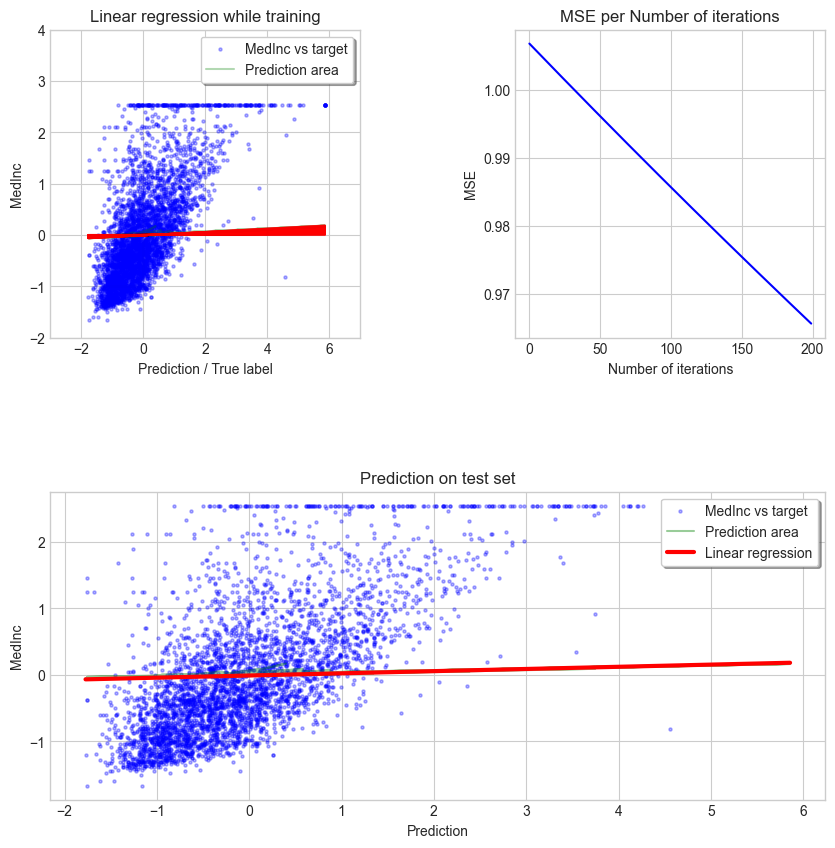


CROSS-VALIDATION
TEST_R2:  [-0.09121813  0.02588128 -0.01880851 -0.01641296  0.01569059]
TRAIN_R2:  [0.03378462 0.04164091 0.03501458 0.04471301 0.03720408] 

TEST_MSE:  [0.88037633 0.85634577 1.10066231 0.89552744 1.07716161]
TRAIN_MSE:  [0.97919083 0.98324214 0.92615124 0.97142714 0.93179941] 



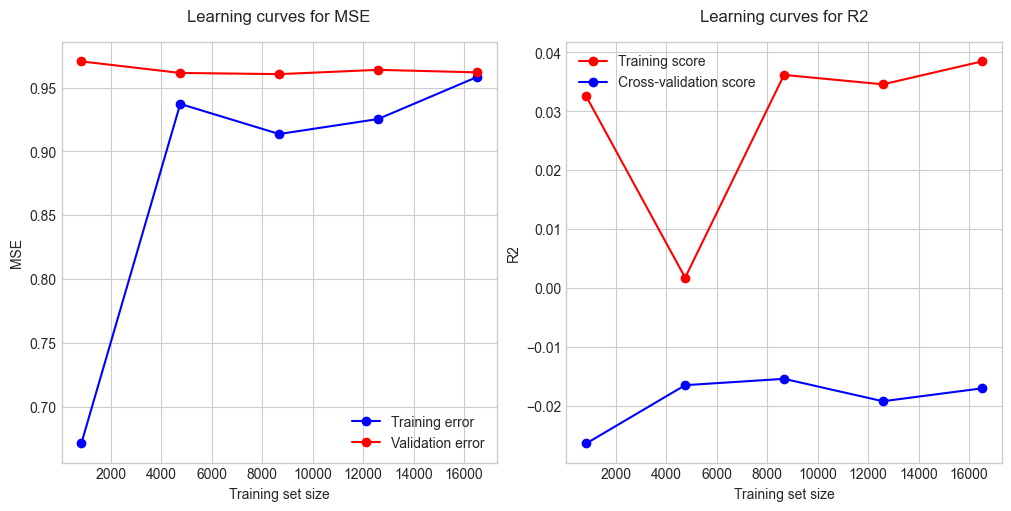

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.6901778474076531
R2:  0.289753037022791
Bias =  [-0.0007768]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


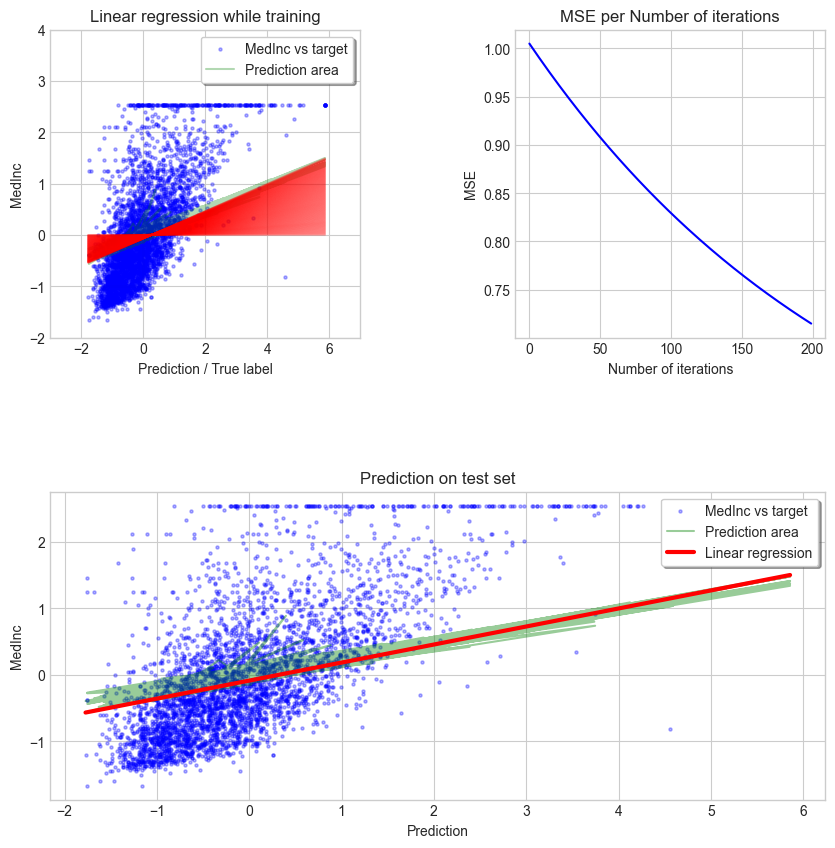


CROSS-VALIDATION
TEST_R2:  [0.19523382 0.26361511 0.23466121 0.15833642 0.26938101]
TRAIN_R2:  [0.27833972 0.30084096 0.27629241 0.31815151 0.2737049 ] 

TEST_MSE:  [0.64927174 0.64735444 0.82682815 0.74156161 0.79953998]
TRAIN_MSE:  [0.73135156 0.71731216 0.69458321 0.69336873 0.70291256] 



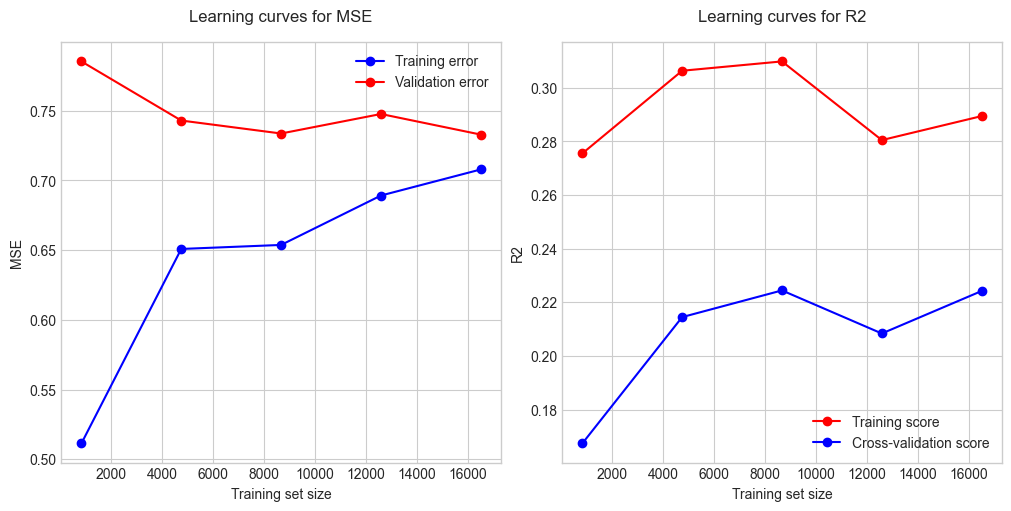

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.4365074313912179
R2:  0.5507997270166264
Bias =  [-0.00392464]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


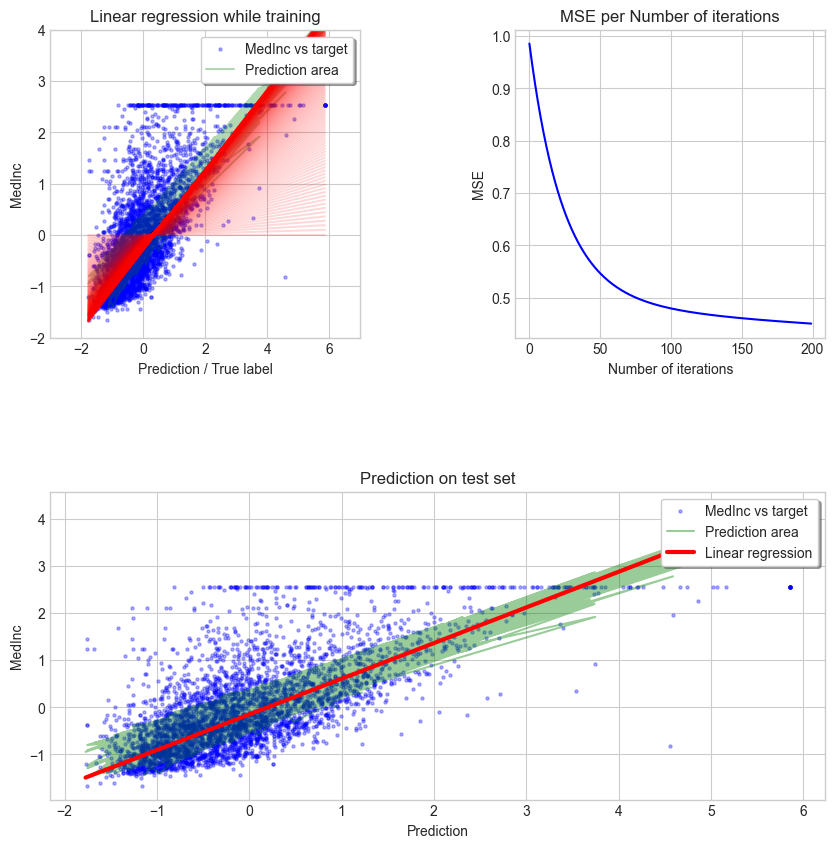


CROSS-VALIDATION
TEST_R2:  [0.51891961 0.42089963 0.51594256 0.40881097 0.57768345]
TRAIN_R2:  [0.53534942 0.58267436 0.55163526 0.56468806 0.52964421] 

TEST_MSE:  [0.38812752 0.50908594 0.5229479  0.52087686 0.46215465]
TRAIN_MSE:  [0.47089044 0.42816118 0.43032106 0.44266679 0.45521303] 



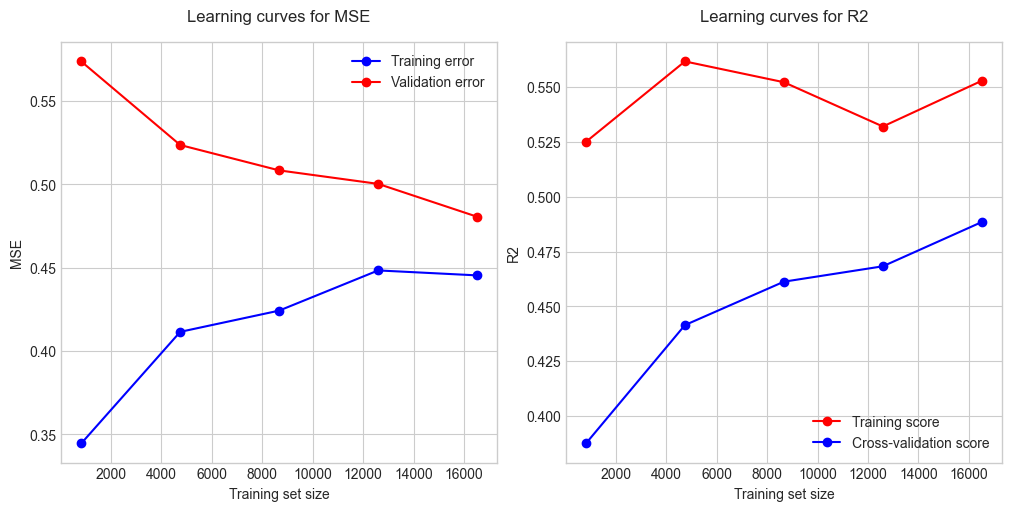

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.3957342805421259
R2:  0.5927584868788138
Bias =  [-0.00216804]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


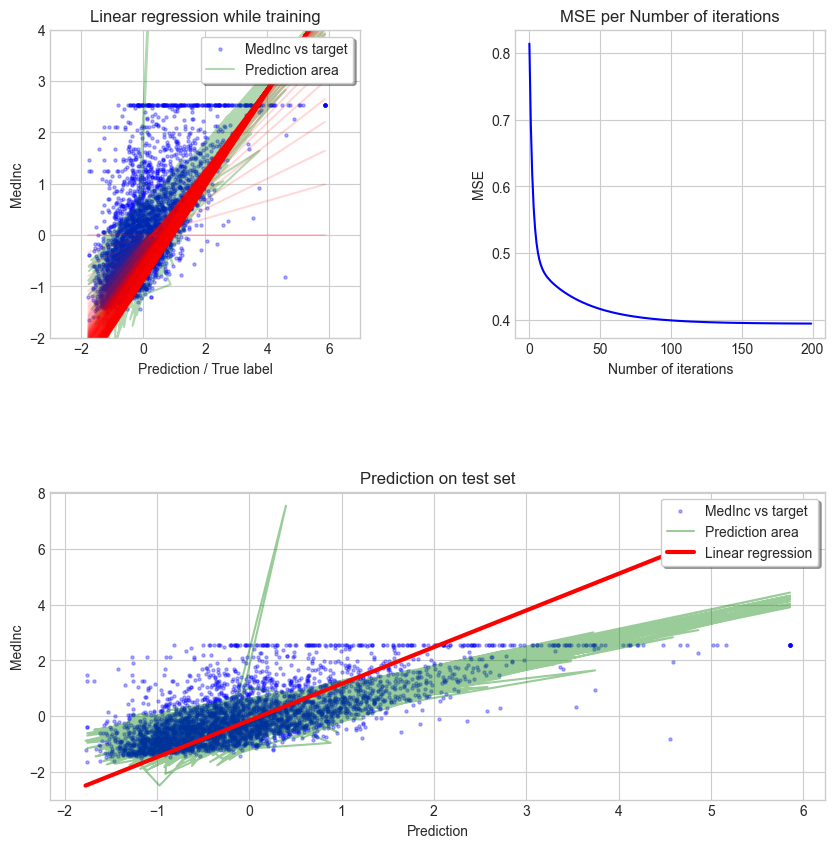


CROSS-VALIDATION
TEST_R2:  [0.55480248 0.46806067 0.55168988 0.5335383  0.65686216]
TRAIN_R2:  [0.59560969 0.63315598 0.61062629 0.61029725 0.58356155] 

TEST_MSE:  [0.35917782 0.46762677 0.48432855 0.41098379 0.37550683]
TRAIN_MSE:  [0.40982093 0.37636884 0.37370403 0.39628701 0.40303152] 



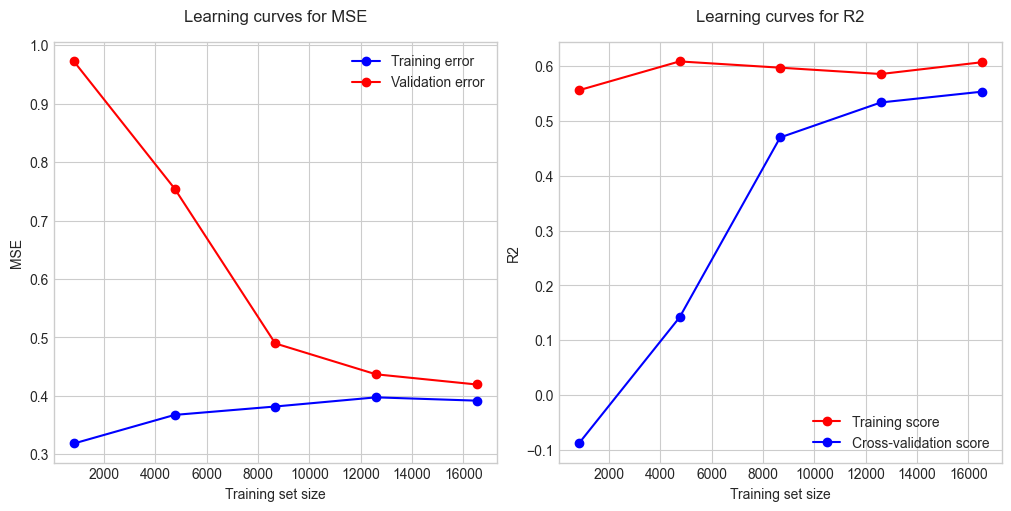

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
Prediction and scores for X_test
MSE:  0.39648957016448305
R2:  0.5919812348089855
Bias =  [-0.00199611]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


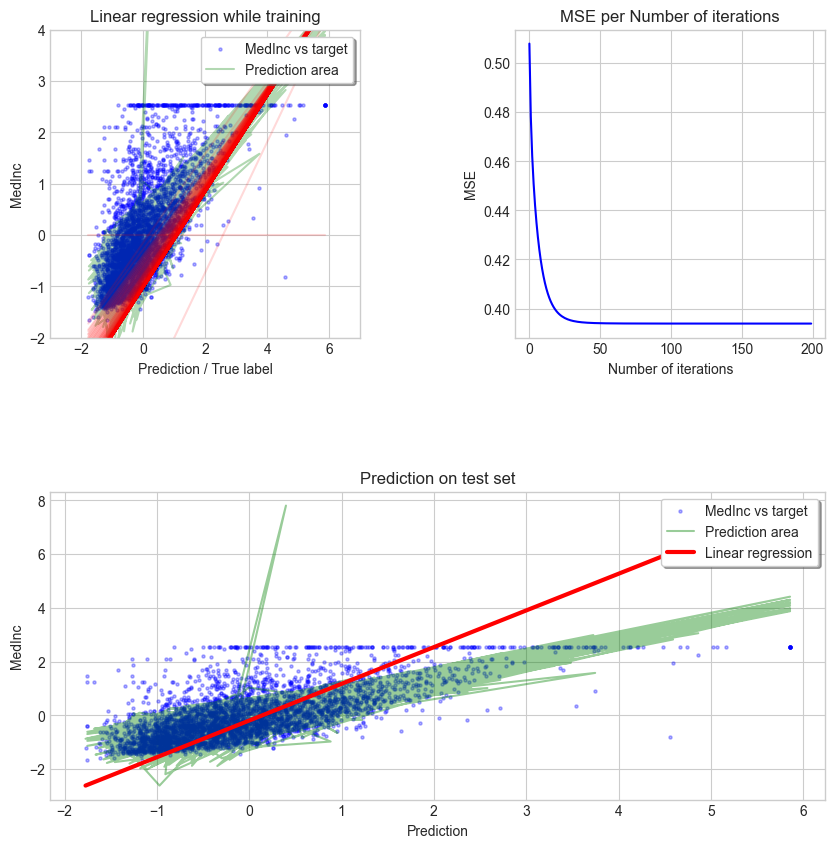


CROSS-VALIDATION
TEST_R2:  [ 5.48664018e-01 -8.14323823e+45 -9.54535175e+06 -1.60939157e+22
 -4.50904439e+38]
TRAIN_R2:  [ 5.96103679e-01 -3.03167901e+46 -1.24438257e+07 -2.22867245e+22
 -1.51341853e+39] 

TEST_MSE:  [3.64130235e-01 7.15870399e+45 1.03122519e+07 1.41798104e+22
 4.93439302e+38]
TRAIN_MSE:  [4.09320304e-01 3.11039420e+46 1.19430462e+07 2.26632721e+22
 1.46469512e+39] 



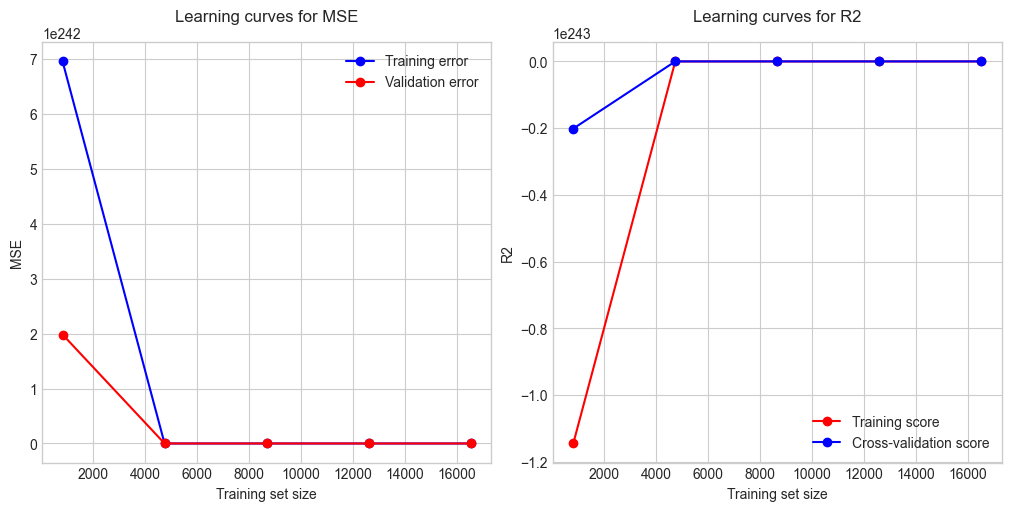

------------------------------------------------------------------------------------


In [19]:
learning_rates_list = [0.0001,0.001,0.01,0.1,0.5]
epochs = 200
GridSearch(BatchGradientDescent,data,target.reshape(-1,1),X_train, y_train,X_test, y_test,learning_rates_list,epochs,[])

In [15]:
class StochasticGradientDescent():
    
    def __init__(self, learning_rate=0.1, iterations=100):
        self.learning_rate, self.iterations = learning_rate, iterations
        
    def fit(self,X, y):
        X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
        theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
        error_list = []
        plot_list = []
        m = len(y)

        for s in range(self.iterations):
            sum_cost = 0.0 # variable for computing average cost per epoch
            for i in range(m):
                randint = np.random.randint(0,m)  # random integer
                X_Stochastic = X[randint,:].reshape(1,X.shape[1])   # random line from the dataset
                y_Stochastic = y[randint].reshape(1,1)  # and its target from y set
                eta = learning_schedule(s*m+i)
                prediction = X_Stochastic.dot(theta)
                gradient = 2*X_Stochastic.T.dot(prediction-y_Stochastic)
                theta = theta - eta * gradient
                sum_cost += cost(X_Stochastic, y_Stochastic, theta) # sum of costs to find the mean of the epoch
                plot_list.append((min(X_Stochastic[:,0]), max(X_Stochastic[:,0]),min(prediction), max(prediction))) # regression line data
            error_list.append(sum_cost/m)
                
        self.theta,self.error_list = theta,error_list
        self.plot_list = plot_list

        
    def get_plot_list(self):
        return self.plot_list
        
    def predict(self,X):
        return np.dot(X, self.theta[0:8]) + self.theta[8]
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "iterations": self.iterations}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
    
    def get_fit_result(self):
        return self.theta,self.error_list
    
t0 , t1 = 5 , 50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  100
Prediction and scores for X_test
MSE:  3.481906028200768
R2:  -2.5831535178800777
Bias =  [-0.00398354]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


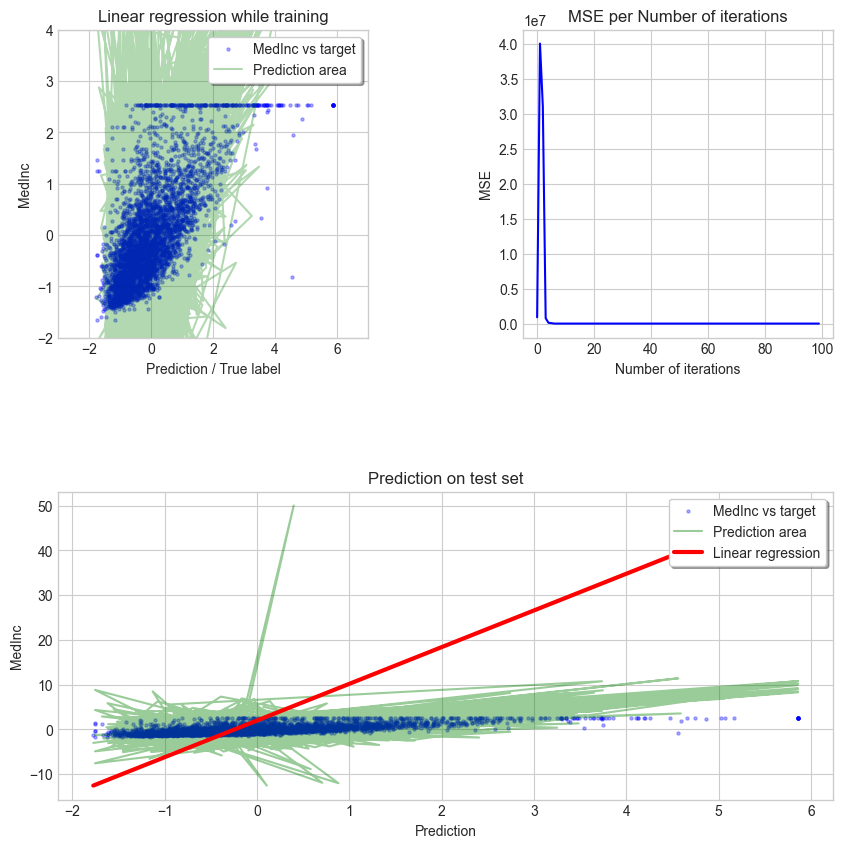


CROSS-VALIDATION
TEST_R2:  [ 5.51909900e-01 -1.42944366e+03  5.52839382e-01  5.34873672e-01
  6.62126972e-01]
TRAIN_R2:  [ 5.93208585e-01 -1.43075159e+03  6.10507078e-01  6.10560279e-01
  5.84109142e-01] 

TEST_MSE:  [3.61511513e-01 1.25750008e+03 4.83086696e-01 4.09807238e-01
 3.69745375e-01]
TRAIN_MSE:  [4.12254276e-01 1.46892591e+03 3.73818445e-01 3.96019539e-01
 4.02501555e-01] 



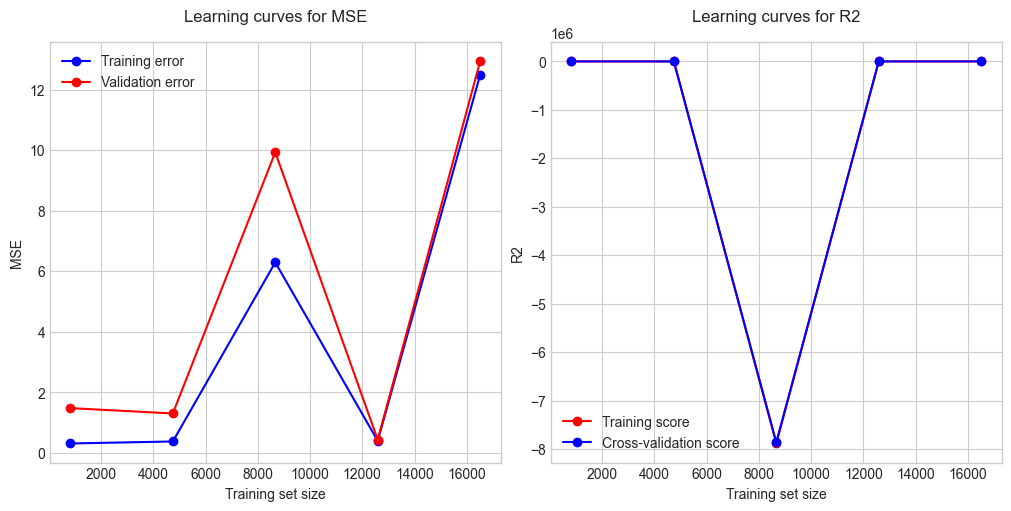

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  100
Prediction and scores for X_test
MSE:  4.441635200239081
R2:  -3.5707898673820786
Bias =  [0.01002379]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


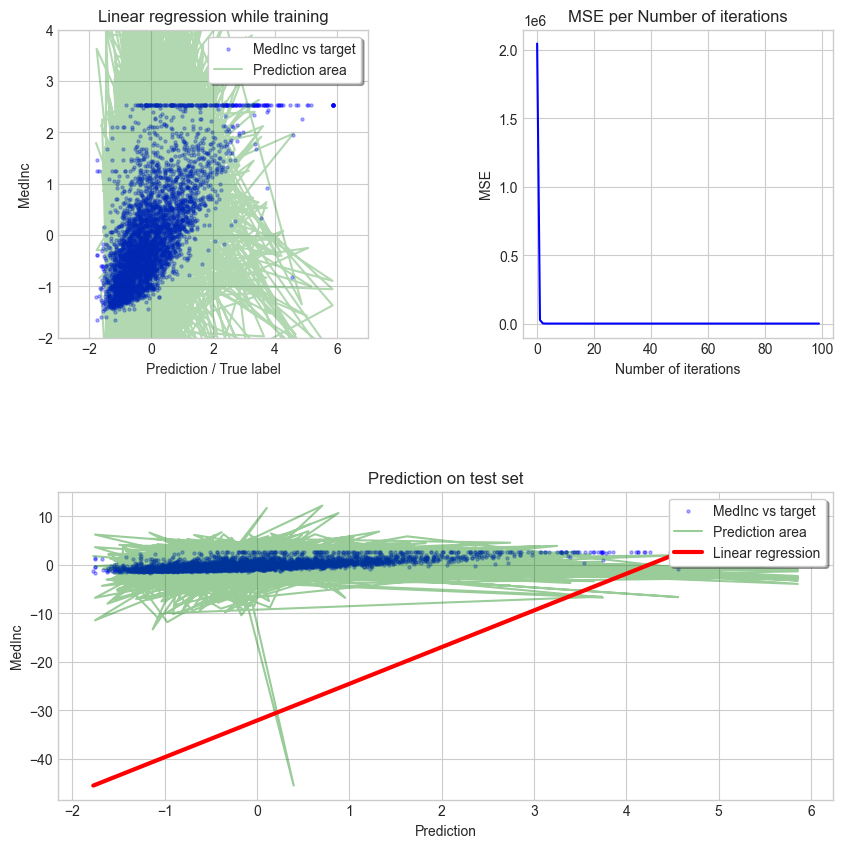


CROSS-VALIDATION
TEST_R2:  [0.53340767 0.46889151 0.5498289  0.41226359 0.56400562]
TRAIN_R2:  [0.5894985  0.63325454 0.61095988 0.50562567 0.51722175] 

TEST_MSE:  [0.3764388  0.46689638 0.48633905 0.51783488 0.47712275]
TRAIN_MSE:  [0.41601419 0.37626773 0.37338387 0.50272708 0.46723556] 



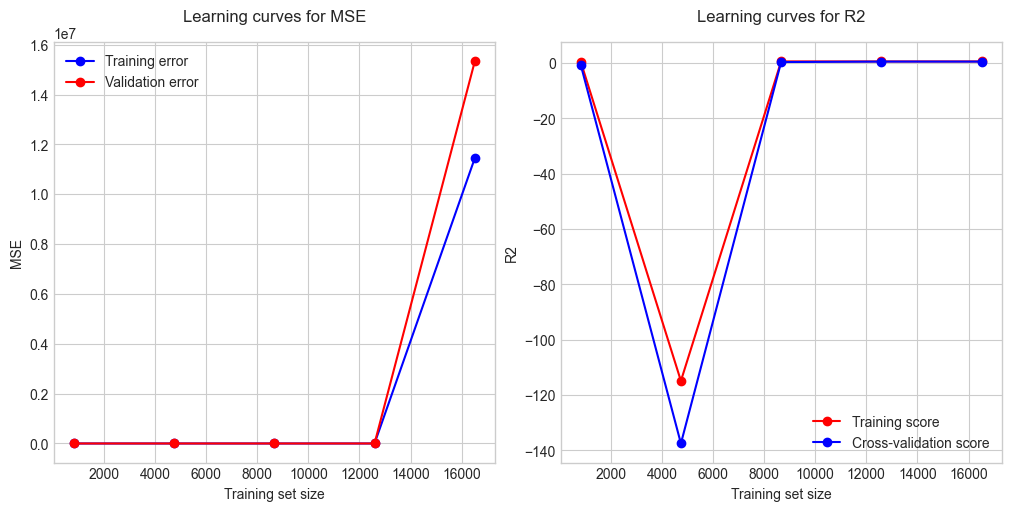

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  100
Prediction and scores for X_test
MSE:  1499.2851290530111
R2:  -1541.8816116693379
Bias =  [-0.11924131]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


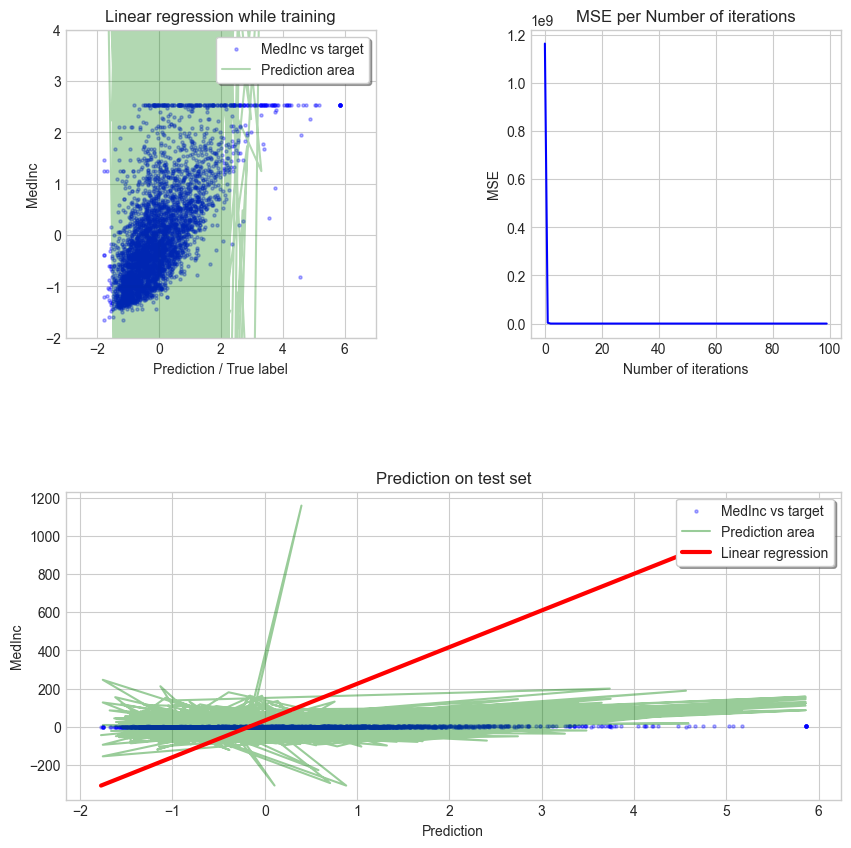


CROSS-VALIDATION
TEST_R2:  [ 5.52622819e-01  4.69282118e-01  5.50977072e-01 -2.06407509e+03
  6.64113248e-01]
TRAIN_R2:  [ 5.96057141e-01  6.33181424e-01  6.06823230e-01 -1.92757419e+03
  5.84306574e-01] 

TEST_MSE:  [3.60936342e-01 4.66552999e-01 4.85098629e-01 1.81946854e+03
 3.67571730e-01]
TRAIN_MSE:  [4.09367466e-01 3.76342736e-01 3.77354043e-01 1.96115861e+03
 4.02310479e-01] 



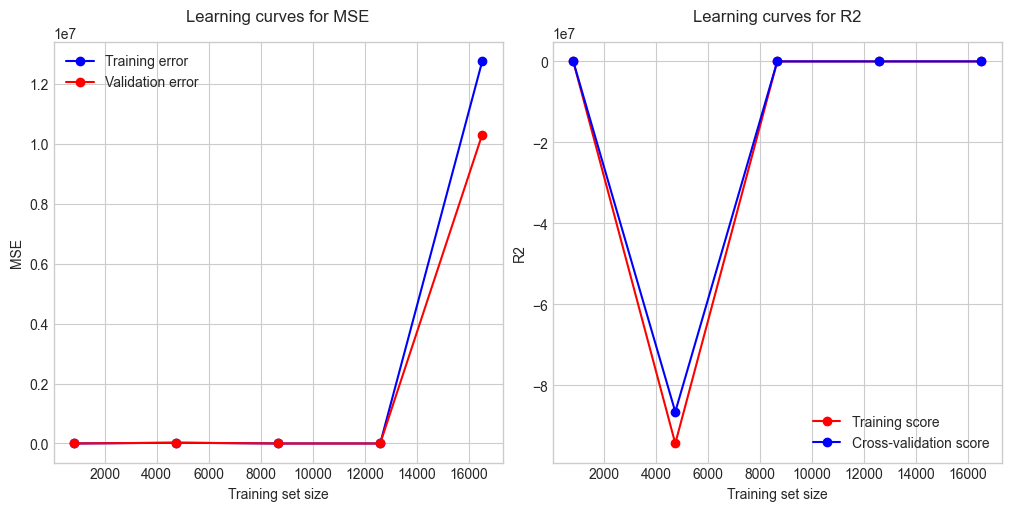

------------------------------------------------------------------------------------


In [20]:
learning_rates_list = [0.001,0.01,0.1]
epochs = 100 # not 200 because of time executing
GridSearch(StochasticGradientDescent,data,target.reshape(-1,1),X_train, y_train,X_test, y_test,learning_rates_list,epochs,[])

In [14]:
from sklearn.utils import shuffle

class MiniBatchGradientDescent():
    
    def __init__(self, learning_rate=0.1, iterations=100, batch_size = 10):
        self.learning_rate, self.iterations, self.batch_size = learning_rate, iterations, batch_size
        
    def fit(self,X, y):
        X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
        theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
        error_list = []
        plot_list = []
        m = len(y)

        for s in range(self.iterations):
            sum_cost = 0.0
            indices = np.random.permutation(len(y))   # random generator of a serie of indices from len(y)
            X = X[indices]
            y = y[indices]
            
            for i in range(0, m, self.batch_size):
                X_i = X[i:i+self.batch_size]  # taking a batch of them
                y_i = y[i:i+self.batch_size]
                prediction = X_i.dot(theta)
                gradient = (2/m)*(X_i.T.dot(prediction-y_i))
                theta = theta - self.learning_rate * gradient
                sum_cost += cost(X_i, y_i, theta)
                plot_list.append((min(X_i[:,0]), max(X_i[:,0]),min(prediction), max(prediction)))
                
            error_list.append(sum_cost/int(m/self.batch_size)) 
            
        self.theta,self.error_list = theta,error_list
        self.plot_list = plot_list

    def get_plot_list(self):
        return self.plot_list

    def predict(self,X):
        return np.dot(X, self.theta[0:8]) + self.theta[8]
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "iterations": self.iterations}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
    
    def get_fit_result(self):
        return self.theta,self.error_list

------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.6903616406957869
R2:  0.2895638993603712
Bias =  [-0.00077668]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


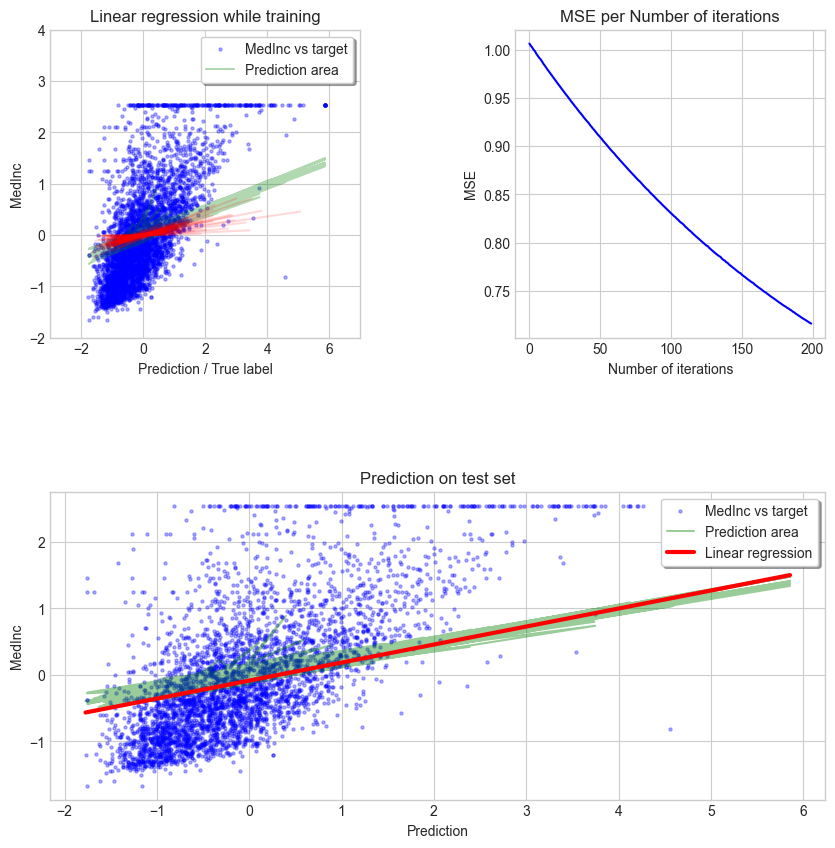


CROSS-VALIDATION
TEST_R2:  [0.19501868 0.26343788 0.23447566 0.15824581 0.26919365]
TRAIN_R2:  [0.2781523  0.30064712 0.27611495 0.31793112 0.27352785] 

TEST_MSE:  [0.64944531 0.64751025 0.82702861 0.74164144 0.79974501]
TRAIN_MSE:  [0.73154149 0.71751104 0.69475354 0.69359284 0.70308391] 



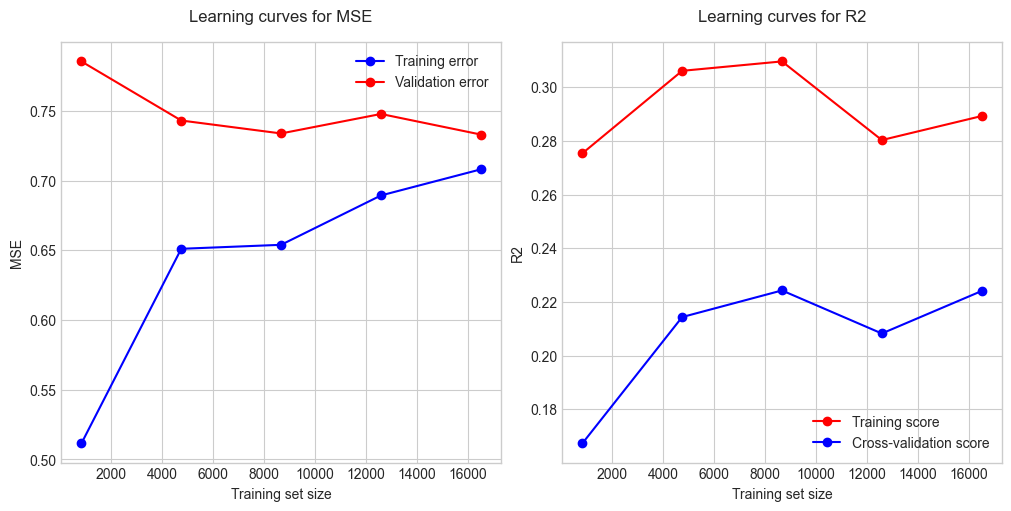

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.436550271240154
R2:  0.5507556414628585
Bias =  [-0.00391703]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


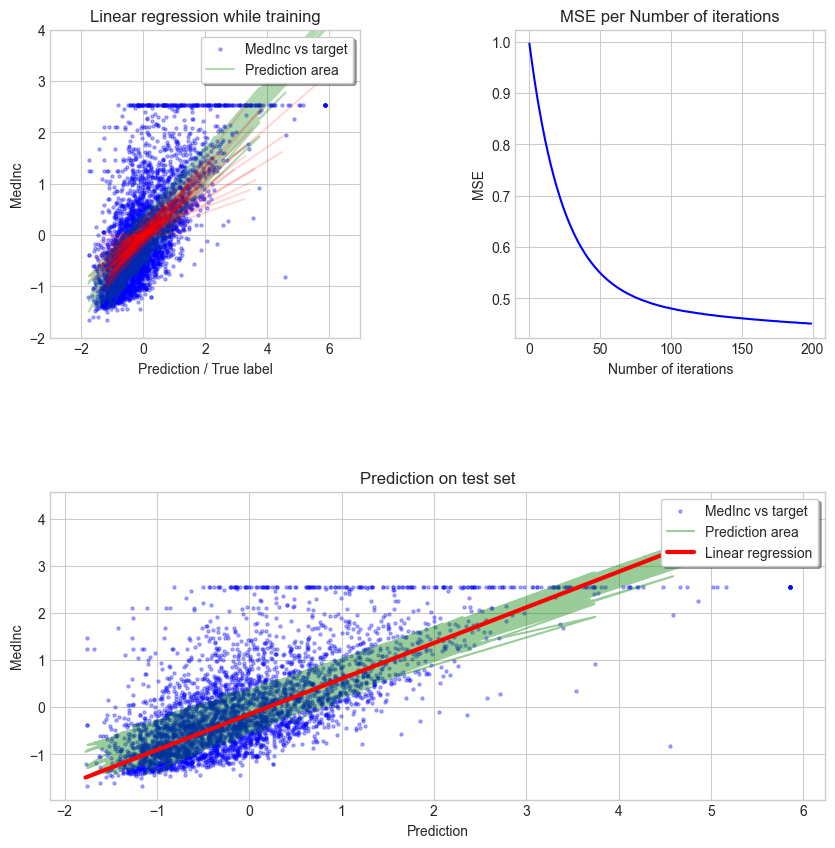


CROSS-VALIDATION
TEST_R2:  [0.51887042 0.42097994 0.51590517 0.40860238 0.57762568]
TRAIN_R2:  [0.53530524 0.58262355 0.55158286 0.56465293 0.52959911] 

TEST_MSE:  [0.38816721 0.50901535 0.52298831 0.52106064 0.46221787]
TRAIN_MSE:  [0.47093521 0.42821331 0.43037136 0.44270252 0.45525667] 



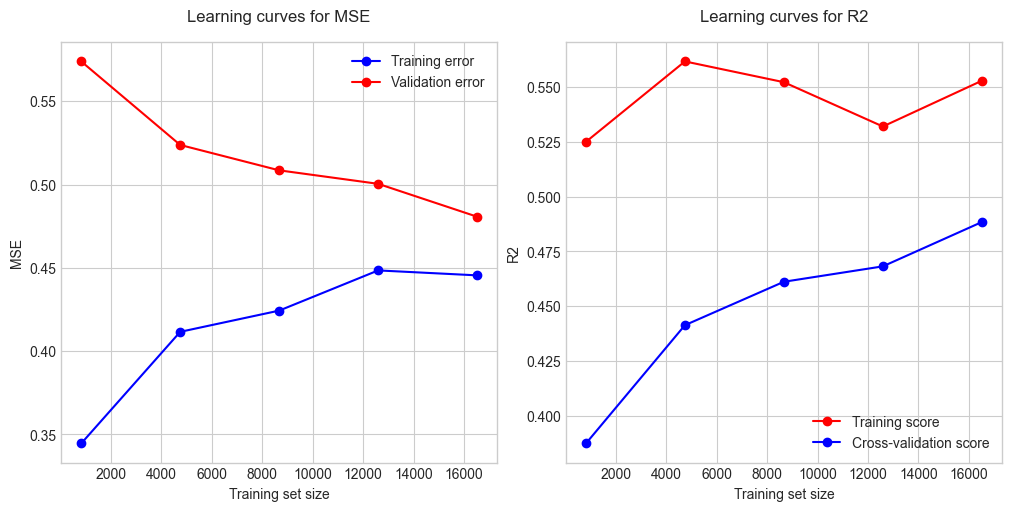

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.39581525990692584
R2:  0.5926751527814809
Bias =  [-0.00233985]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


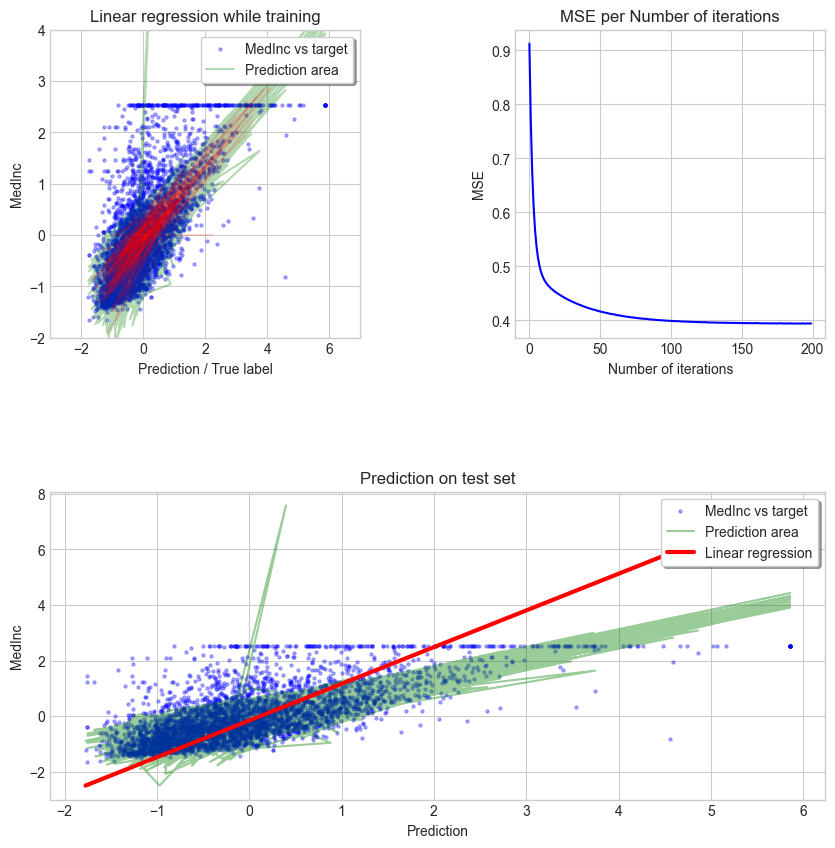


CROSS-VALIDATION
TEST_R2:  [0.55500817 0.46793065 0.55160341 0.53313701 0.65739046]
TRAIN_R2:  [0.59559323 0.63314843 0.61061357 0.61028514 0.58352588] 

TEST_MSE:  [0.35901188 0.46774107 0.48442196 0.41133736 0.37492869]
TRAIN_MSE:  [0.40983761 0.37637659 0.37371624 0.39629932 0.40306604] 



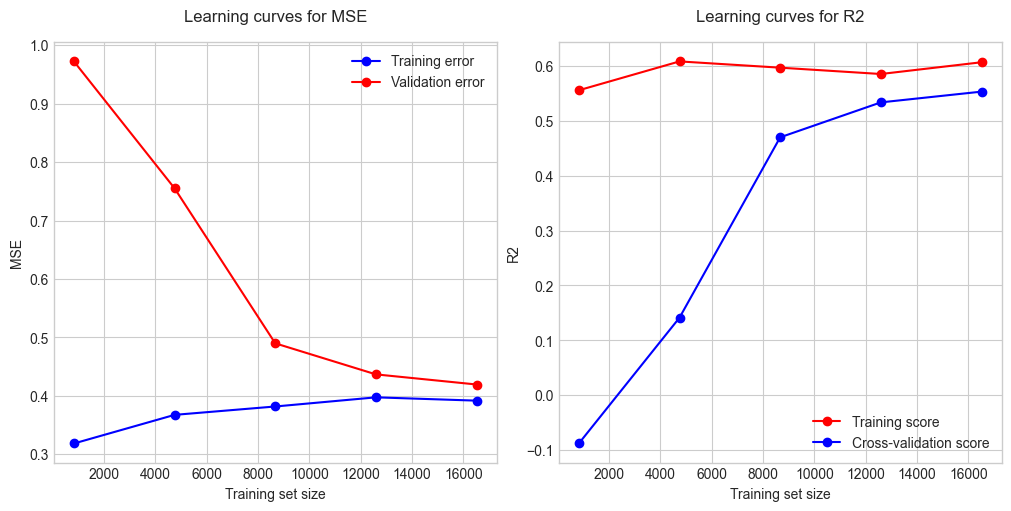

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  5
Prediction and scores for X_test
MSE:  0.39520628447376577
R2:  0.5933018361118054
Bias =  [-0.00250025]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


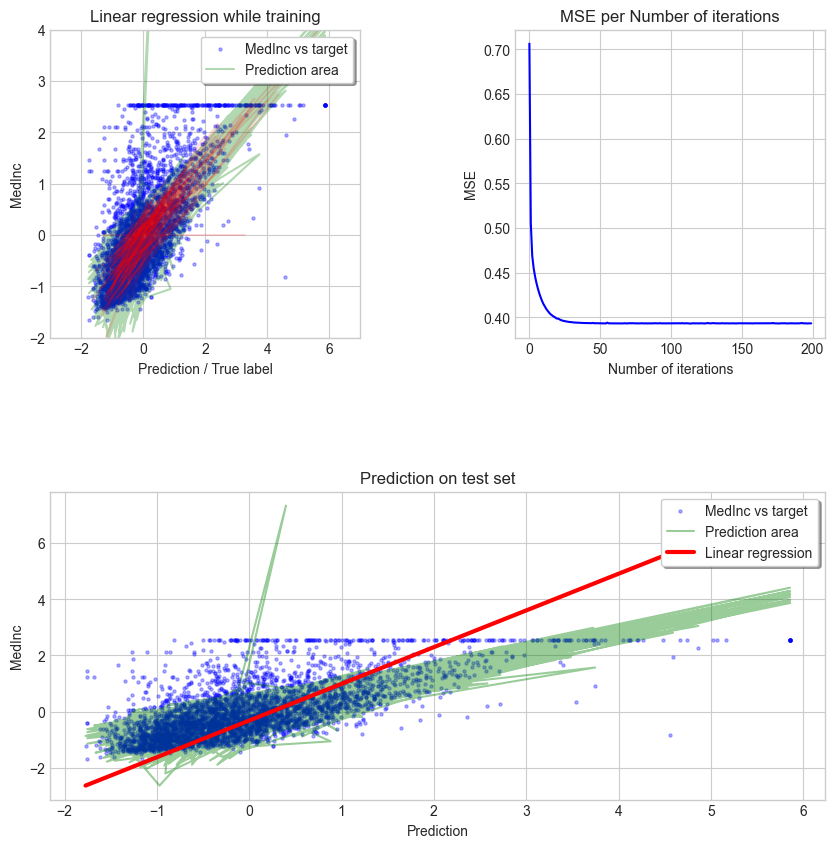


CROSS-VALIDATION
TEST_R2:  [0.54596113 0.46742137 0.551703   0.53487546 0.66224774]
TRAIN_R2:  [0.59608591 0.63309112 0.61088243 0.61049441 0.58438304] 

TEST_MSE:  [0.36631088 0.46818878 0.48431437 0.40980566 0.36961322]
TRAIN_MSE:  [0.40933831 0.37643539 0.3734582  0.39608652 0.40223647] 



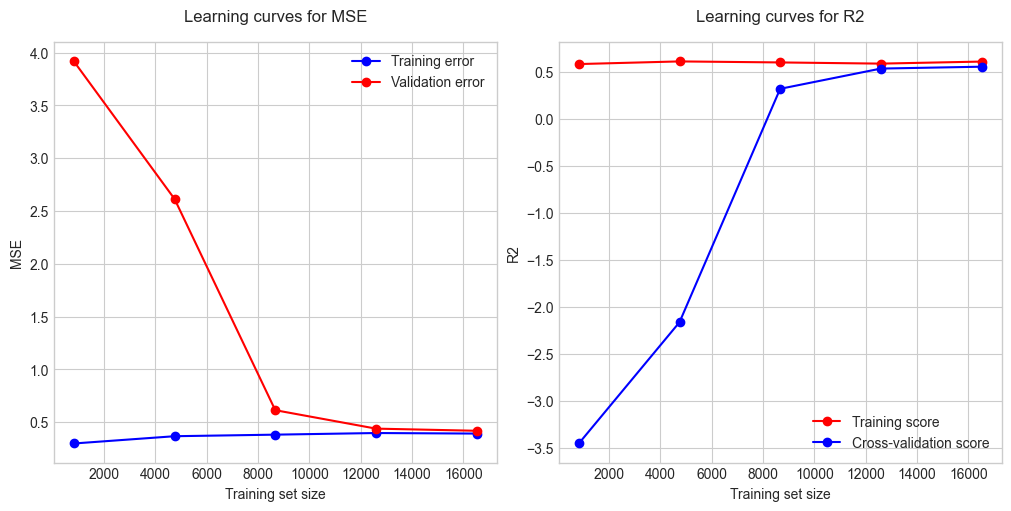

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.6903616002559235
R2:  0.2895639409761521
Bias =  [-0.00077655]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


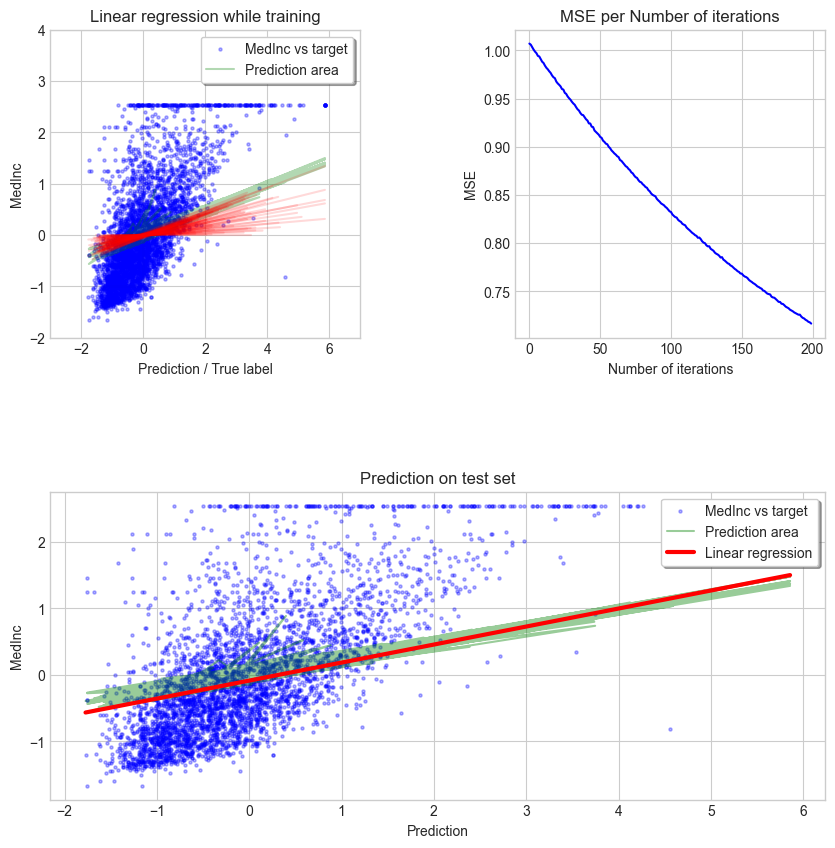


CROSS-VALIDATION
TEST_R2:  [0.19501835 0.26343794 0.23447571 0.15824565 0.26919367]
TRAIN_R2:  [0.2781524  0.3006471  0.27611498 0.31793098 0.27352772] 

TEST_MSE:  [0.64944558 0.6475102  0.82702855 0.74164159 0.79974499]
TRAIN_MSE:  [0.7315414  0.71751106 0.6947535  0.69359299 0.70308403] 



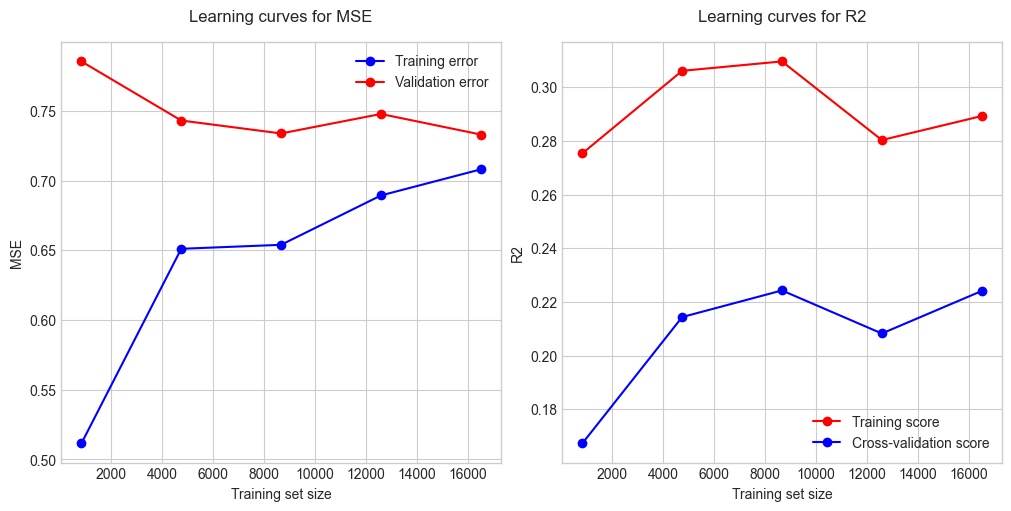

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.43655103963253405
R2:  0.5507548507270267
Bias =  [-0.00391826]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


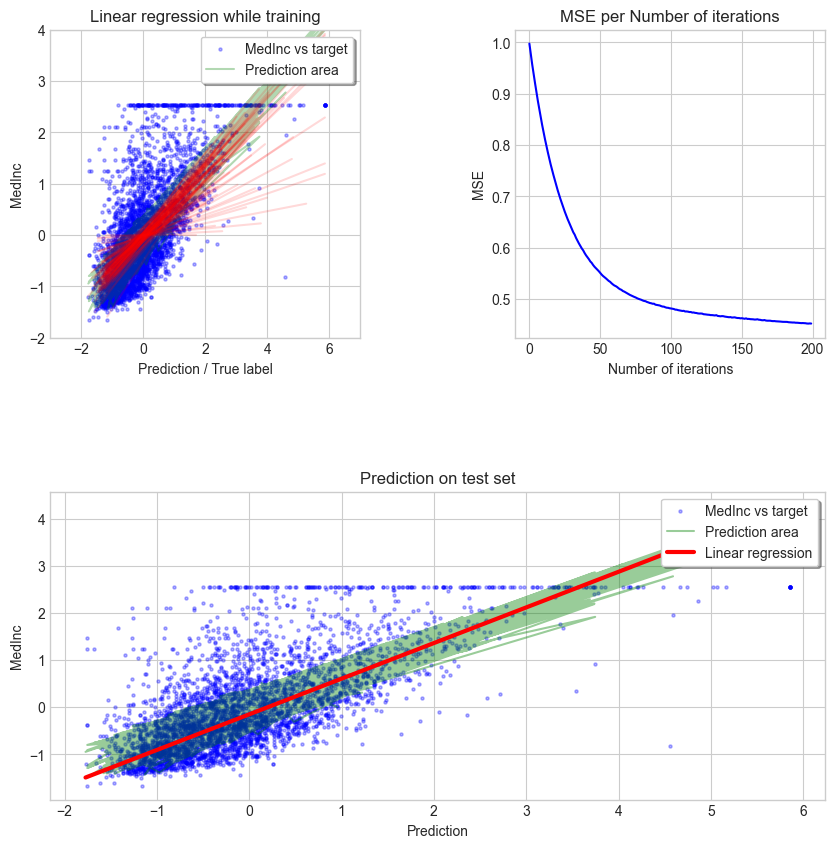


CROSS-VALIDATION
TEST_R2:  [0.51886593 0.42098063 0.51590619 0.4085962  0.57761597]
TRAIN_R2:  [0.53530515 0.58262369 0.55158326 0.56465271 0.52959956] 

TEST_MSE:  [0.38817083 0.50901473 0.52298719 0.52106609 0.4622285 ]
TRAIN_MSE:  [0.4709353  0.42821316 0.43037097 0.44270274 0.45525624] 



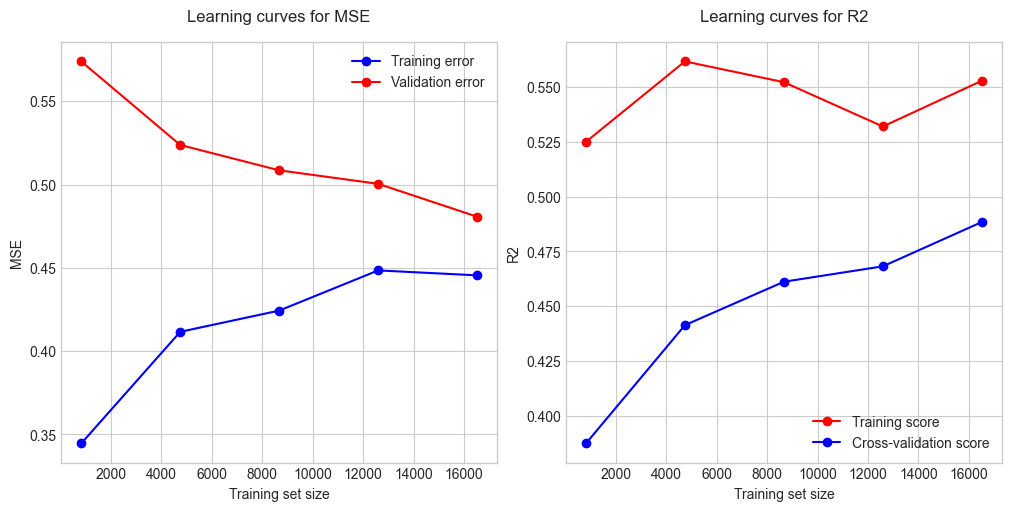

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.39575570180541136
R2:  0.5927364427241821
Bias =  [-0.00221389]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


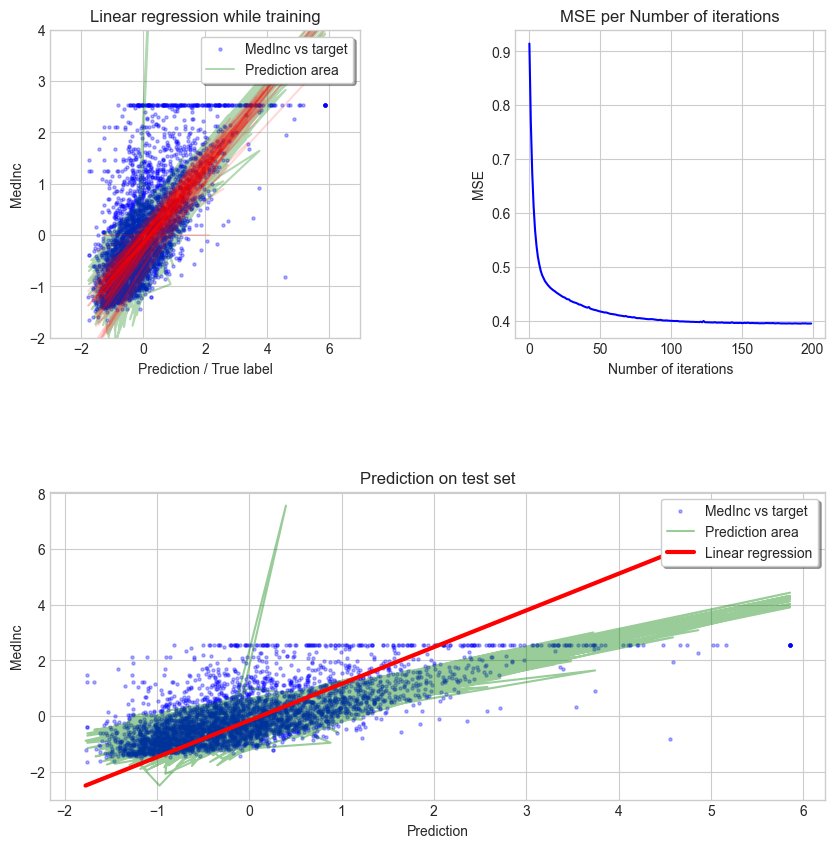


CROSS-VALIDATION
TEST_R2:  [0.55546636 0.46796247 0.55121835 0.53309835 0.65735875]
TRAIN_R2:  [0.5955916  0.63313953 0.6106062  0.61027944 0.5835386 ] 

TEST_MSE:  [0.35864222 0.4677131  0.48483797 0.41137142 0.37496339]
TRAIN_MSE:  [0.40983926 0.37638572 0.37372332 0.39630512 0.40305373] 



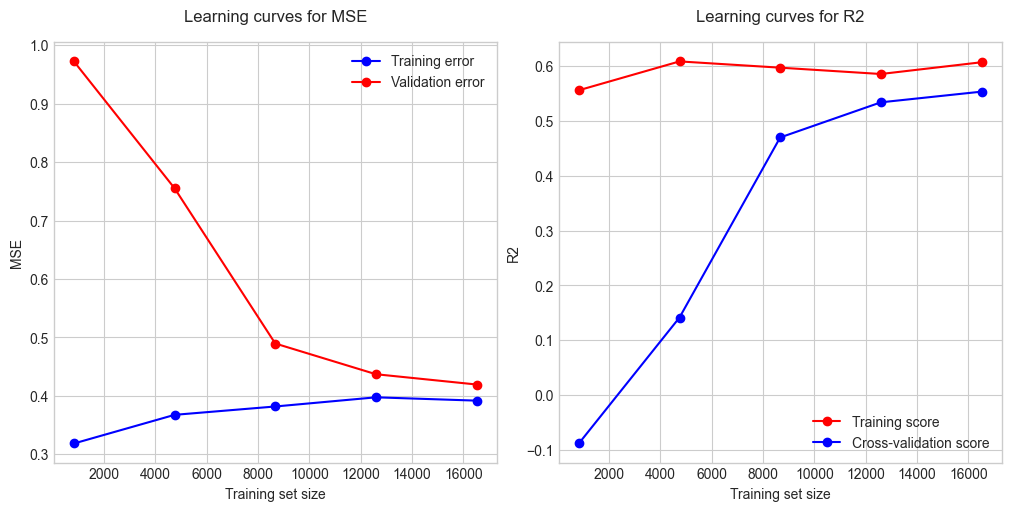

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  30
Prediction and scores for X_test
MSE:  0.3967482326194373
R2:  0.5917150509206477
Bias =  [-0.00166875]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


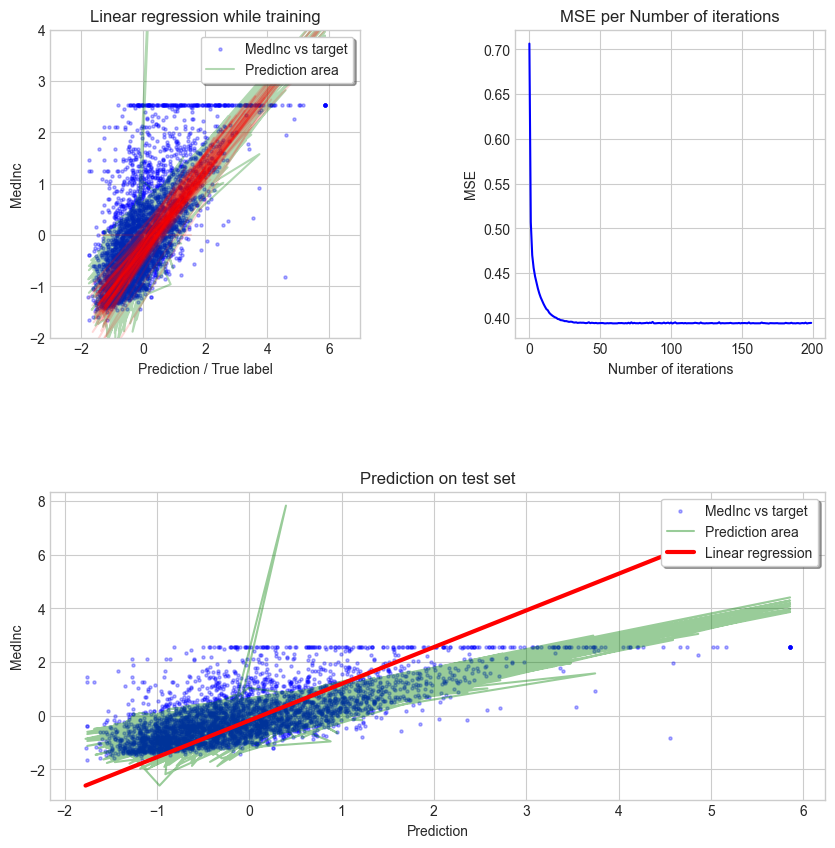


CROSS-VALIDATION
TEST_R2:  [0.55074732 0.46703509 0.55218558 0.53560696 0.66230855]
TRAIN_R2:  [0.59609207 0.63312996 0.61085304 0.61057547 0.58418368] 

TEST_MSE:  [0.36244946 0.46852836 0.48379302 0.40916116 0.36954667]
TRAIN_MSE:  [0.40933207 0.37639554 0.3734864  0.39600409 0.40242942] 



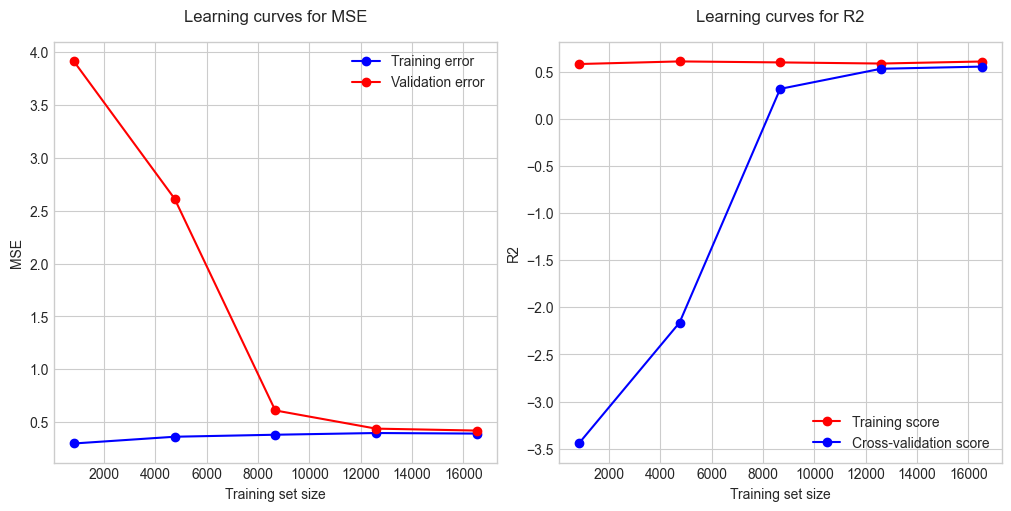

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.6903614749528171
R2:  0.2895640699228448
Bias =  [-0.00077673]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


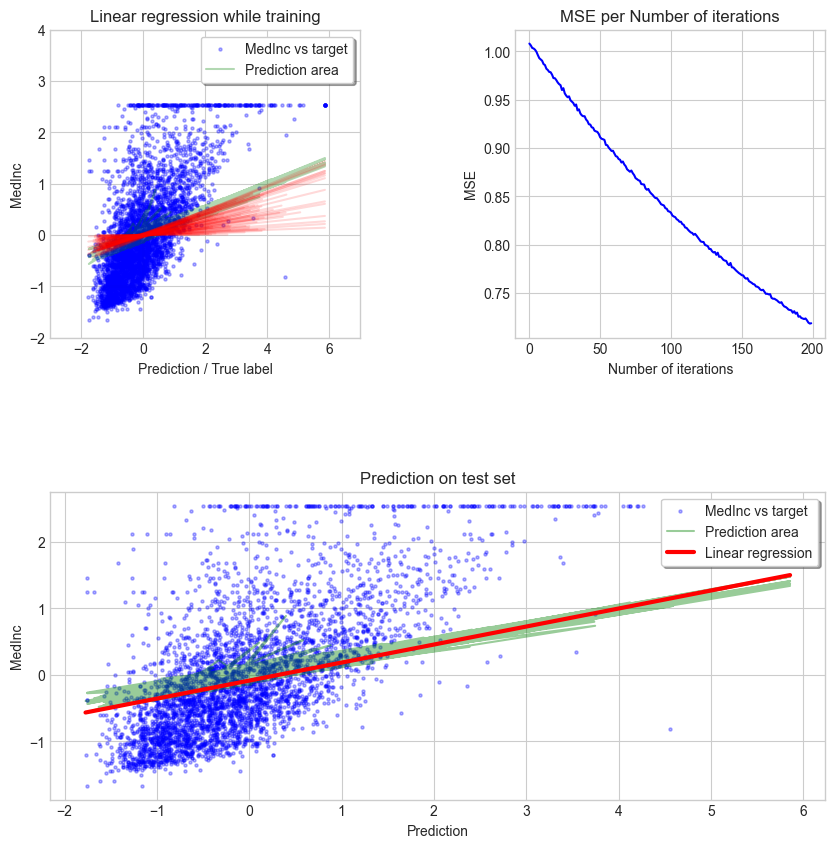


CROSS-VALIDATION
TEST_R2:  [0.19501841 0.26343784 0.23447586 0.15824584 0.2691935 ]
TRAIN_R2:  [0.27815245 0.30064704 0.27611515 0.31793119 0.27352776] 

TEST_MSE:  [0.64944553 0.64751028 0.82702839 0.74164141 0.79974517]
TRAIN_MSE:  [0.73154135 0.71751112 0.69475335 0.69359277 0.703084  ] 



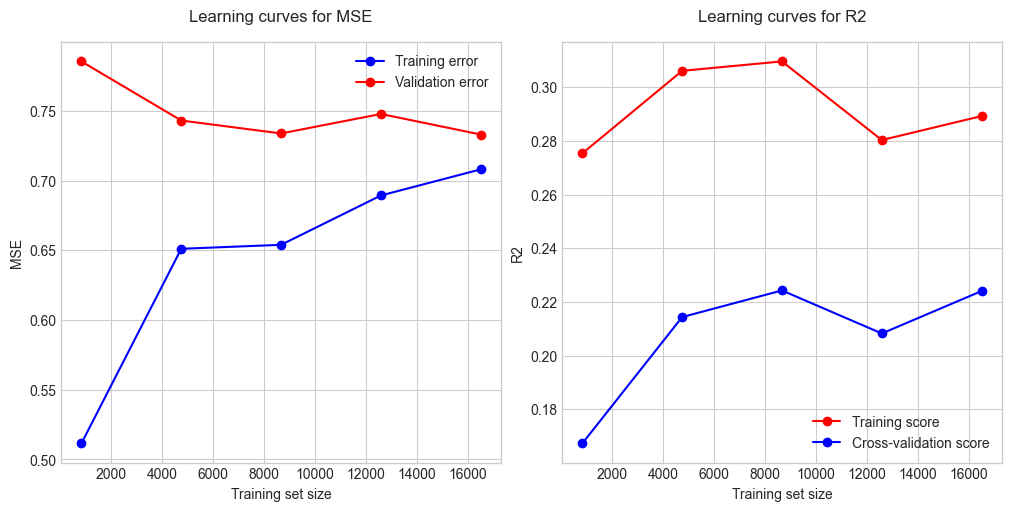

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.43655020410149276
R2:  0.5507557105537899
Bias =  [-0.00391338]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


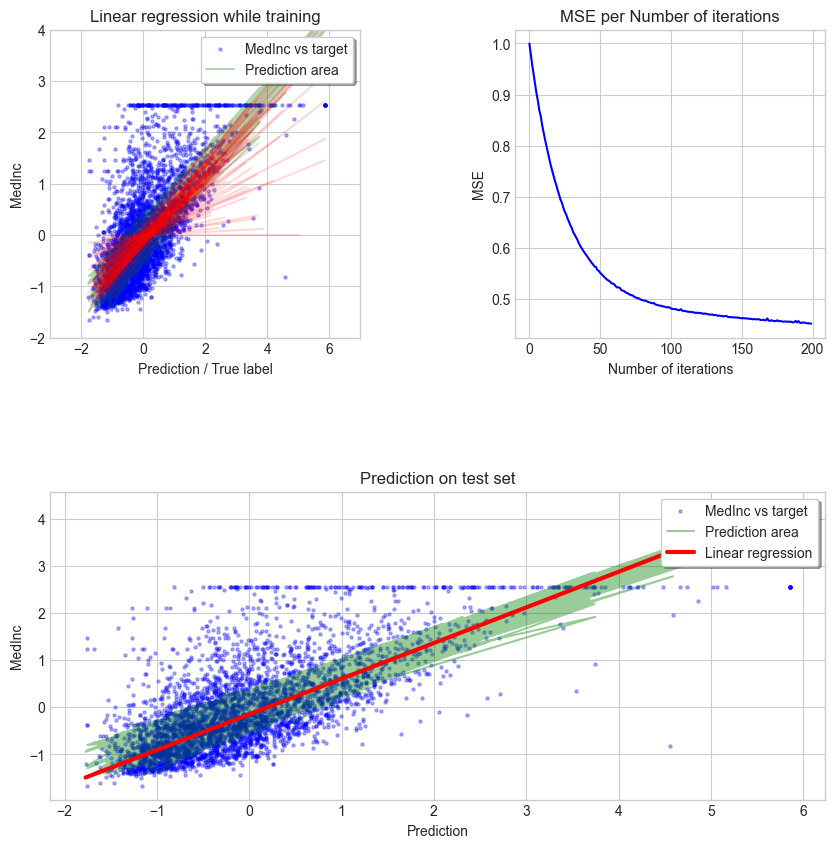


CROSS-VALIDATION
TEST_R2:  [0.51886074 0.42098139 0.51590523 0.40860063 0.57762037]
TRAIN_R2:  [0.53530522 0.58262347 0.55158278 0.56465301 0.52959941] 

TEST_MSE:  [0.38817501 0.50901407 0.52298824 0.52106218 0.46222368]
TRAIN_MSE:  [0.47093524 0.42821339 0.43037143 0.44270244 0.45525638] 



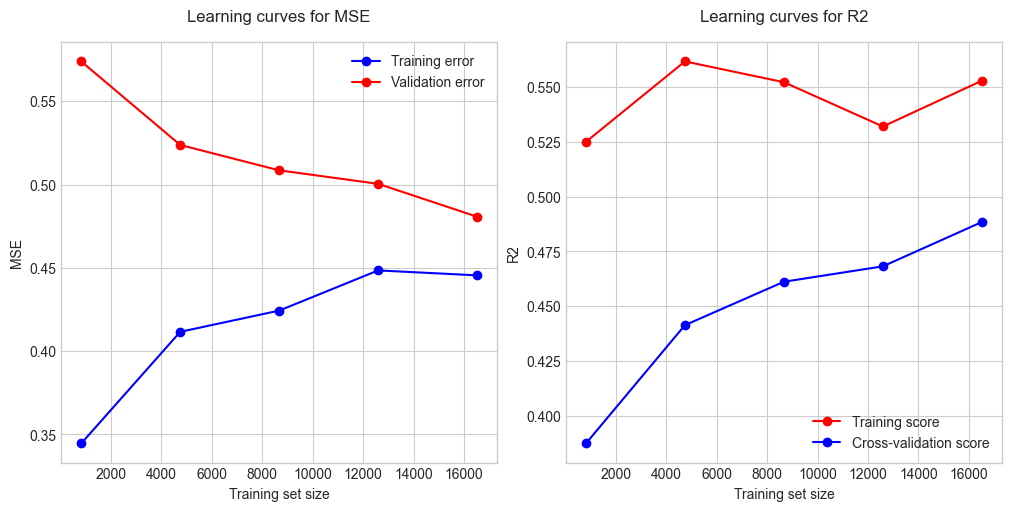

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.39559869618986093
R2:  0.5928980137772577
Bias =  [-0.0020806]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


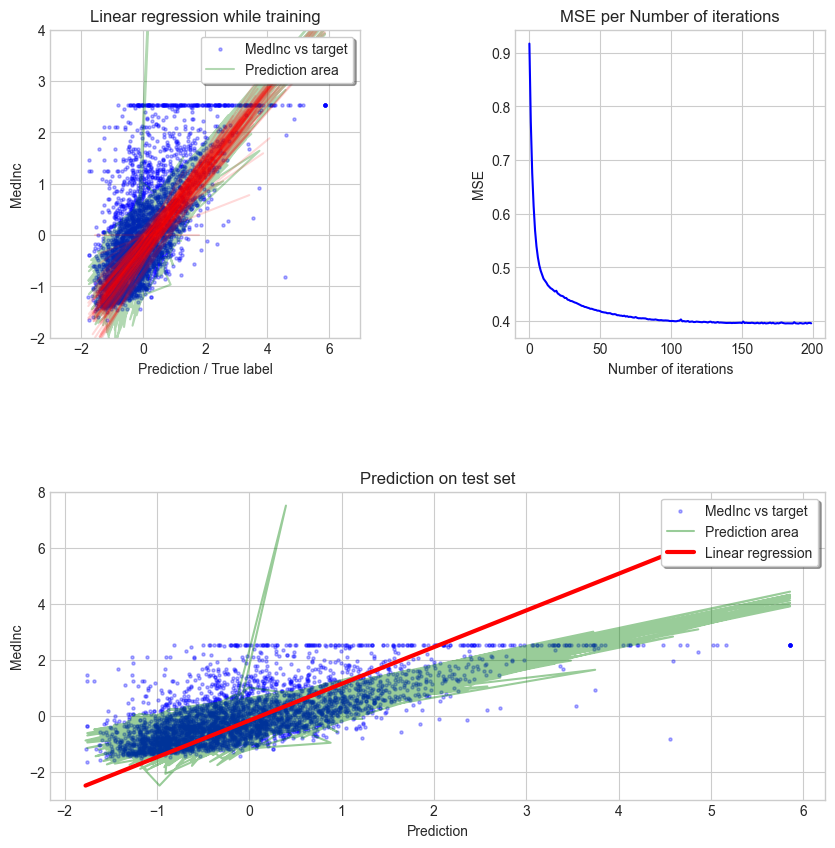


CROSS-VALIDATION
TEST_R2:  [0.55511899 0.46789013 0.55183372 0.53319072 0.65735244]
TRAIN_R2:  [0.59559383 0.63314971 0.61061366 0.61028602 0.58354426] 

TEST_MSE:  [0.35892247 0.4677767  0.48417315 0.41129003 0.3749703 ]
TRAIN_MSE:  [0.409837   0.37637527 0.37371616 0.39629843 0.40304825] 



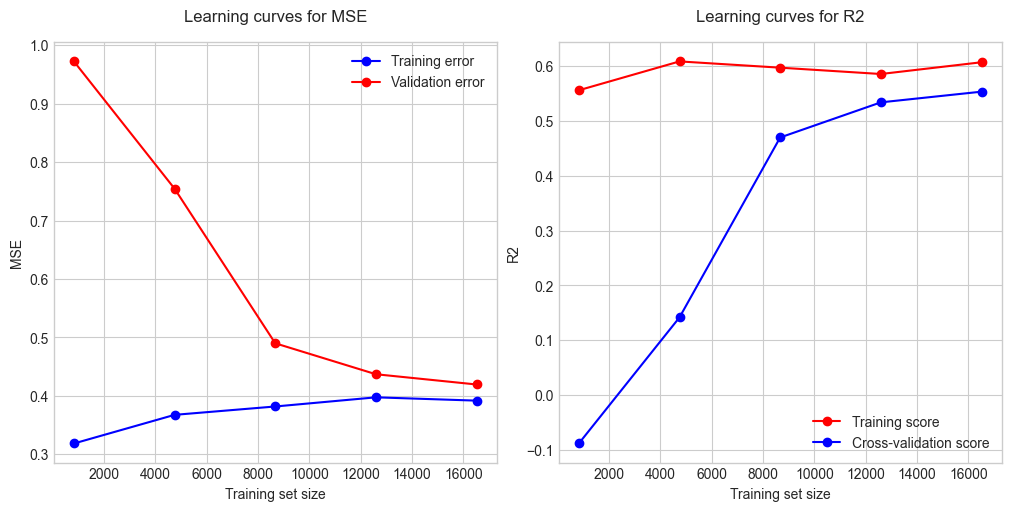

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  50
Prediction and scores for X_test
MSE:  0.39687795356600936
R2:  0.5915815579250621
Bias =  [-0.00314491]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


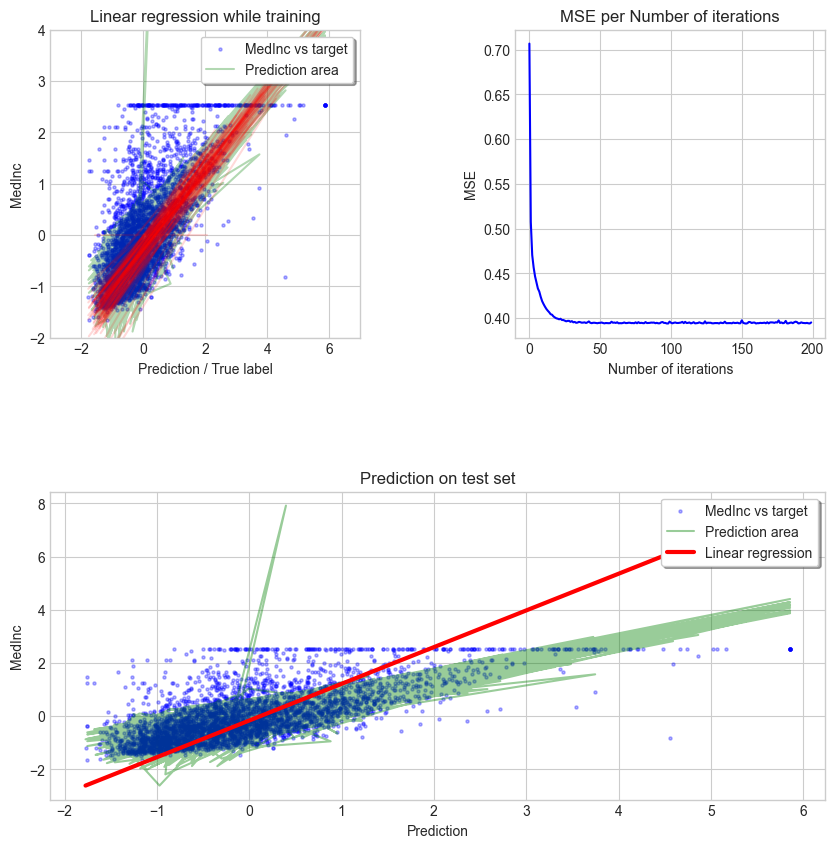


CROSS-VALIDATION
TEST_R2:  [0.55207165 0.46719086 0.5452071  0.53618776 0.66379195]
TRAIN_R2:  [0.59603224 0.63317725 0.61016276 0.60995623 0.58439194] 

TEST_MSE:  [0.36138101 0.46839142 0.49133217 0.40864944 0.36792333]
TRAIN_MSE:  [0.4093927  0.37634701 0.37414891 0.39663379 0.40222786] 



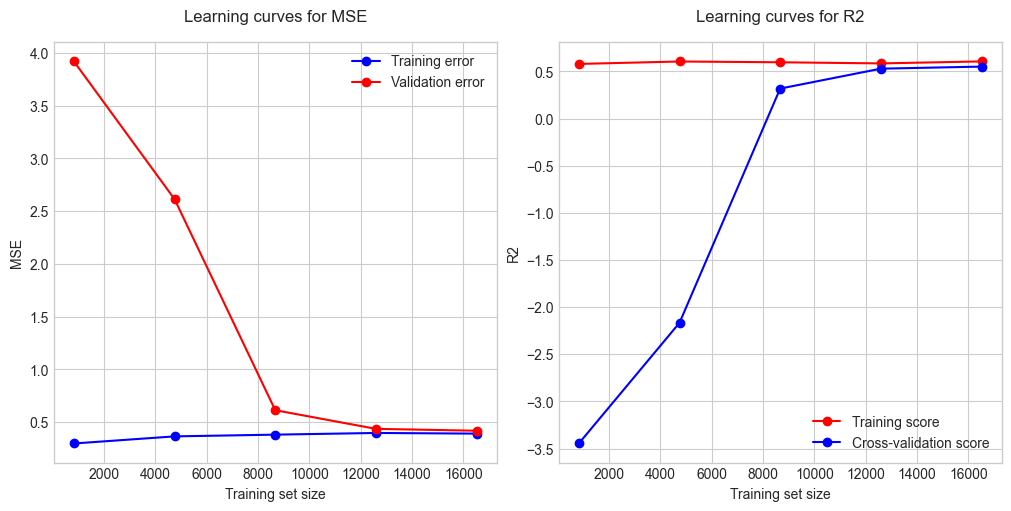

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.001
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.690360799768308
R2:  0.2895647647404904
Bias =  [-0.0007767]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


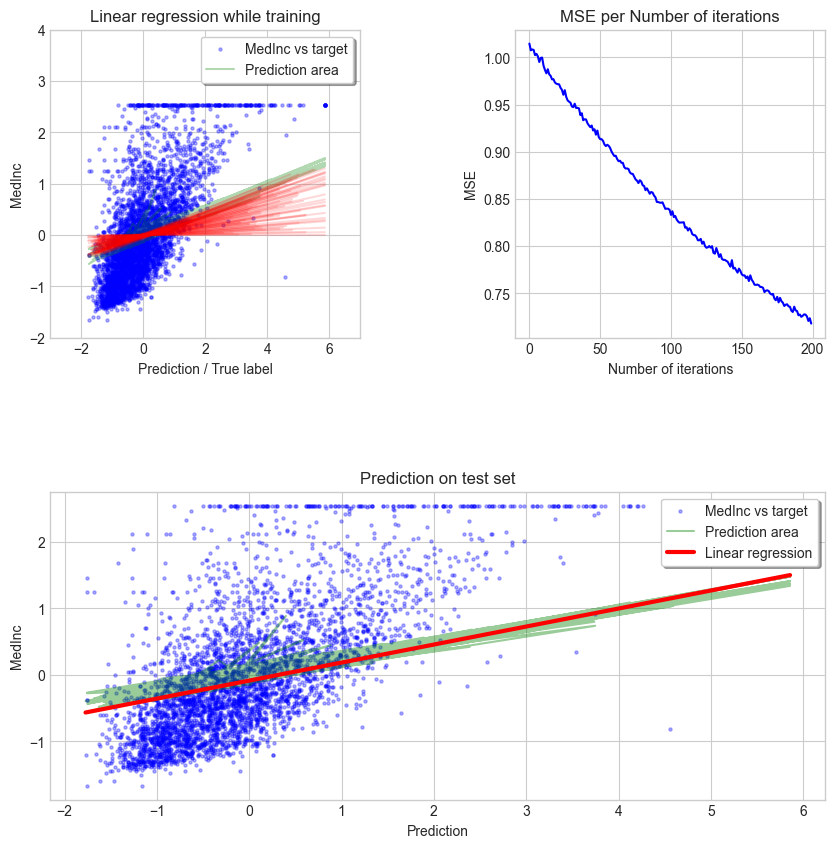


CROSS-VALIDATION
TEST_R2:  [0.19501886 0.26343791 0.23447555 0.15824552 0.26919359]
TRAIN_R2:  [0.27815252 0.30064713 0.27611508 0.31793118 0.27352771] 

TEST_MSE:  [0.64944517 0.64751022 0.82702873 0.7416417  0.79974508]
TRAIN_MSE:  [0.73154128 0.71751103 0.69475341 0.69359279 0.70308404] 



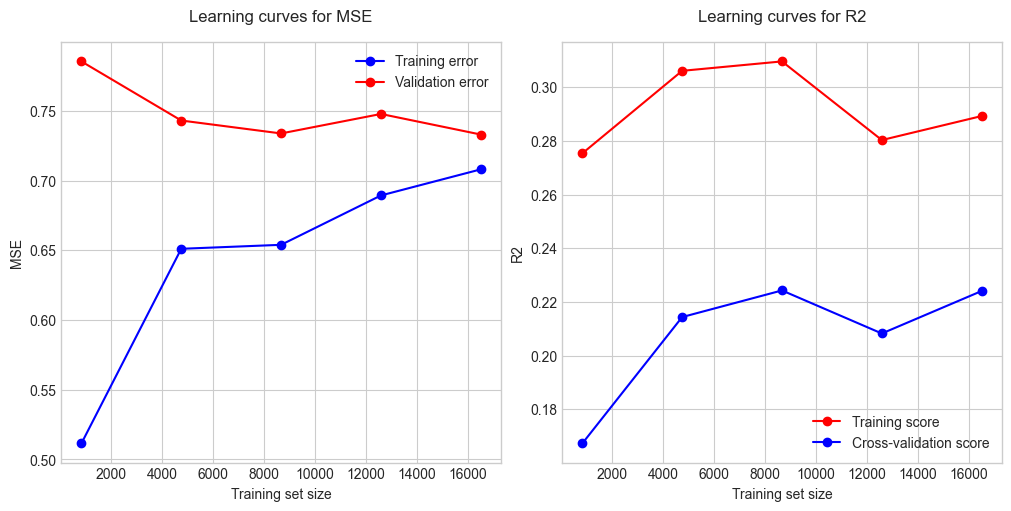

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.01
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.43654960575894725
R2:  0.5507563262950474
Bias =  [-0.00391293]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


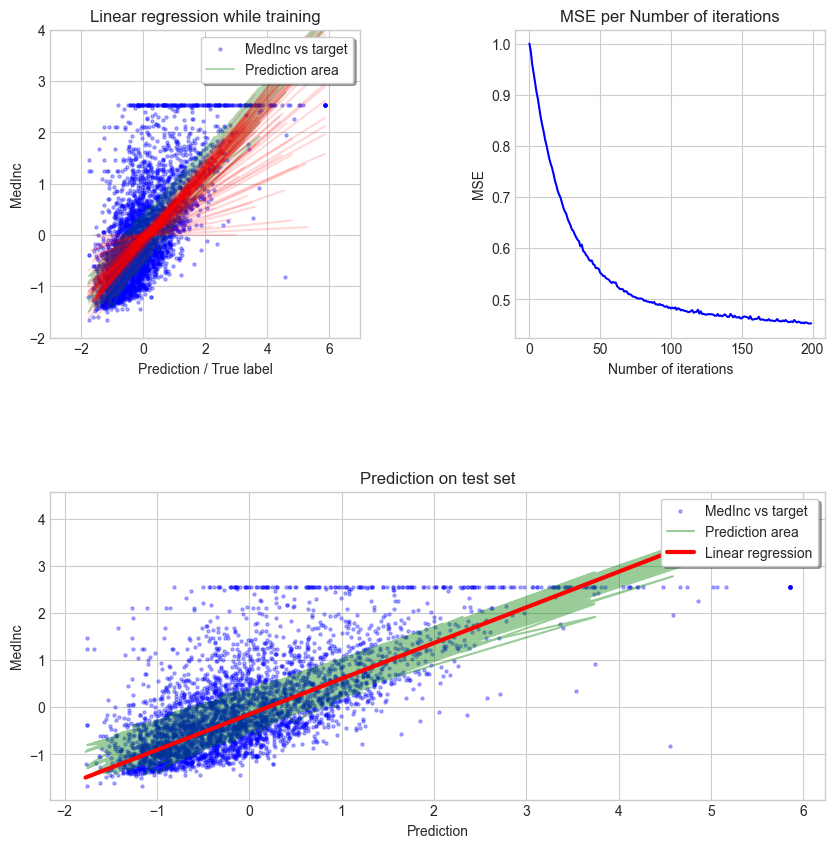


CROSS-VALIDATION
TEST_R2:  [0.51886603 0.42098727 0.51590874 0.40859711 0.57762112]
TRAIN_R2:  [0.53530498 0.5826237  0.55158257 0.56465294 0.52959921] 

TEST_MSE:  [0.38817075 0.50900891 0.52298445 0.52106529 0.46222286]
TRAIN_MSE:  [0.47093548 0.42821315 0.43037164 0.44270251 0.45525658] 



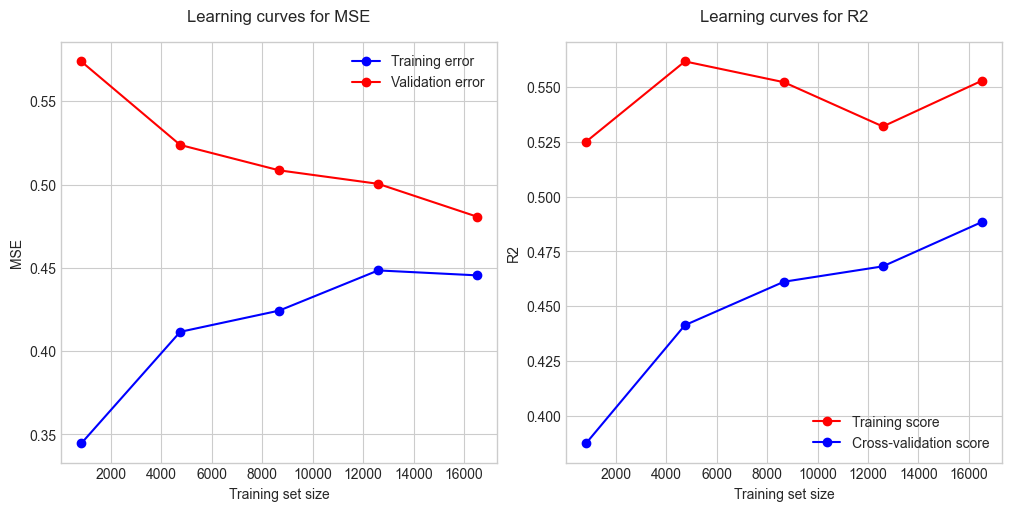

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.1
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.3958296714672875
R2:  0.5926603221591752
Bias =  [-0.00222534]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


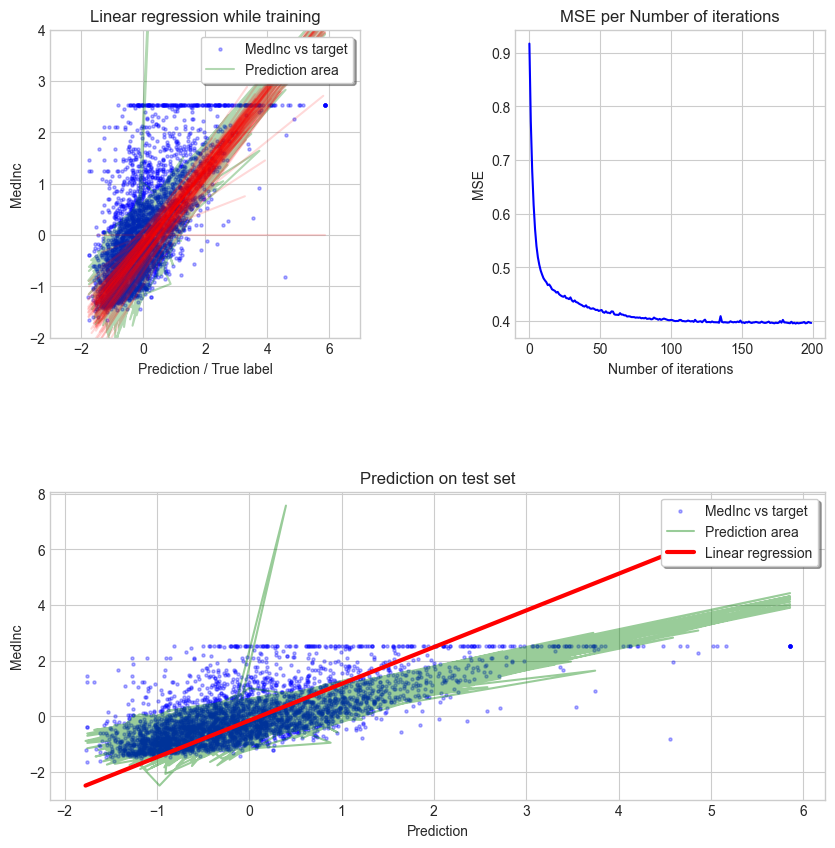


CROSS-VALIDATION
TEST_R2:  [0.55509218 0.46788018 0.55163878 0.53325423 0.65741373]
TRAIN_R2:  [0.59559353 0.63314929 0.61061436 0.61028491 0.58354278] 

TEST_MSE:  [0.3589441  0.46778544 0.48438376 0.41123407 0.37490323]
TRAIN_MSE:  [0.40983731 0.37637571 0.37371548 0.39629956 0.40304968] 



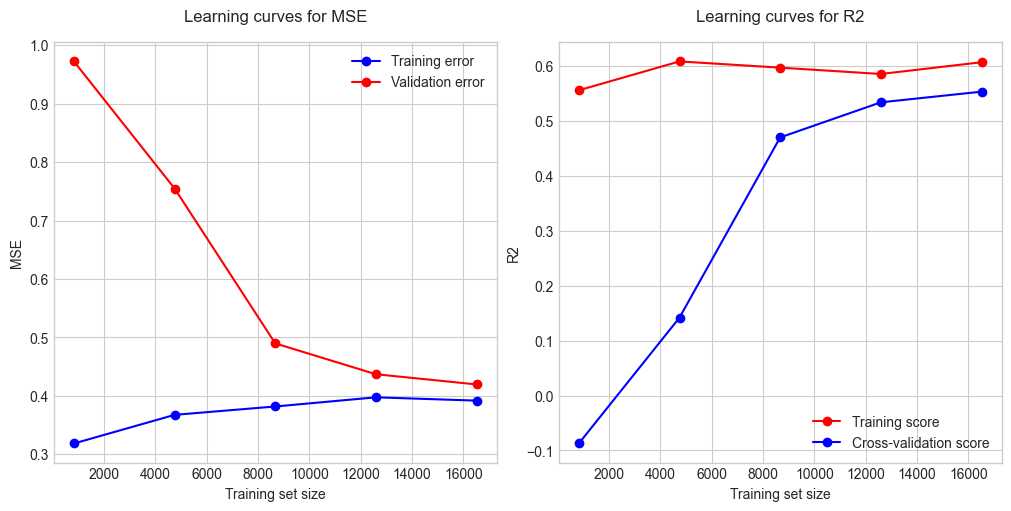

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------

LEARNING RATE:  0.5
MAX_ITERATIONS:  200
BATCH_SIZE:  100
Prediction and scores for X_test
MSE:  0.39694780590116835
R2:  0.591509674411139
Bias =  [-0.00405127]
Plots



C:\Users\ntomczyk\AppData\Local\Temp\ipykernel_3876\3871342958.py:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(222)


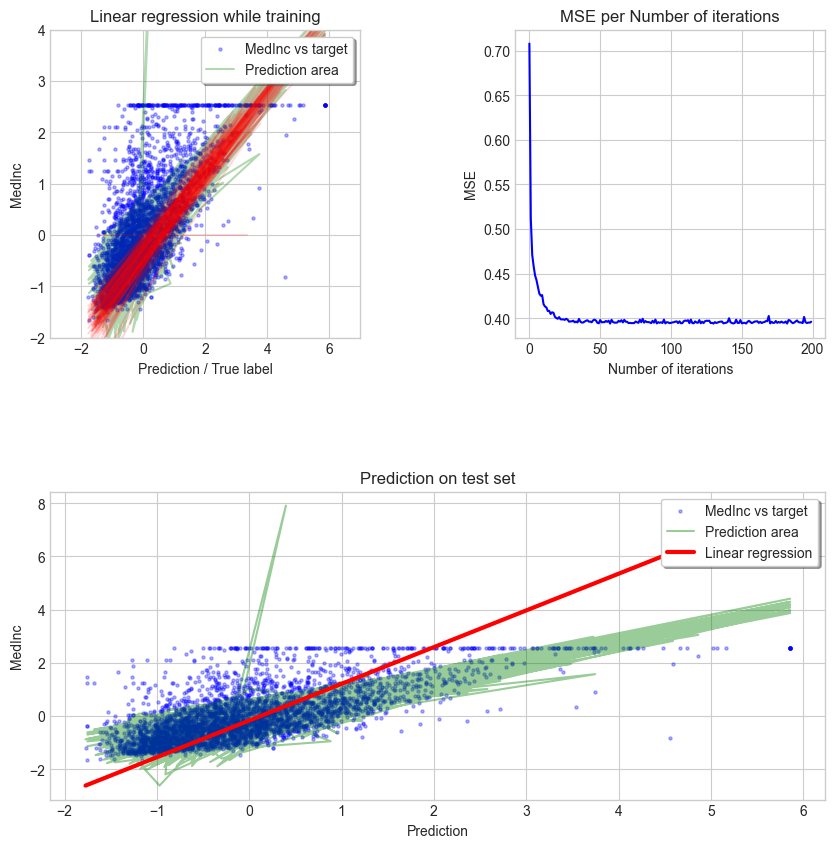


CROSS-VALIDATION
TEST_R2:  [0.54800368 0.4668494  0.54629571 0.53611526 0.66337374]
TRAIN_R2:  [0.5960949  0.63310391 0.61036082 0.61044076 0.58436455] 

TEST_MSE:  [0.36466299 0.46869159 0.49015611 0.40871332 0.368381  ]
TRAIN_MSE:  [0.40932921 0.37642227 0.37395882 0.39614108 0.40225437] 



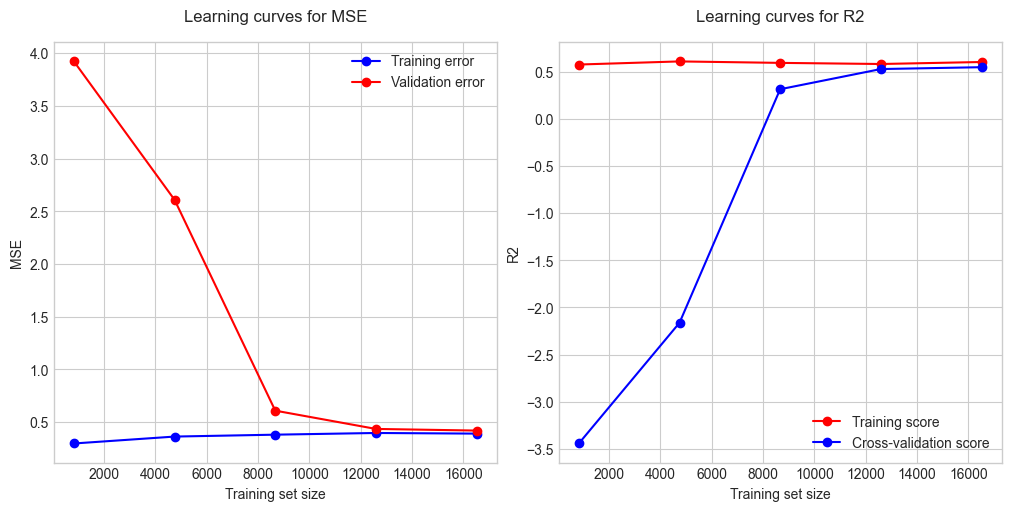

------------------------------------------------------------------------------------


In [21]:
learning_rates_list = [0.001,0.01,0.1,0.5]
epochs = 200
batches = [5,30,50,100]
GridSearch(MiniBatchGradientDescent,data,target.reshape(-1,1),X_train, y_train,X_test, y_test,learning_rates_list,epochs,batches)